In [36]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [1]:
# https://iwatobipen.wordpress.com/2020/01/21/make-report-with-rdkit-and-matplotlib-rdkit-memo-chemoinformatics/
# https://iwatobipen.wordpress.com/2017/11/03/draw-high-quality-molecular-image-in-rdkit-rdkit/

from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import rdMolDraw2D
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem.Draw import SimilarityMaps
from rdkit.Chem import RDConfig
from rdkit.Chem import AllChem
from rdkit.Chem import DataStructs
from matplotlib.backends.backend_pgf import PdfPages
import os
from PIL import Image
import io
import matplotlib.image as mpimg
import cairosvg
import shap

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import xgboost as xgb
from xgboost import XGBRegressor, XGBClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import RepeatedKFold, KFold
import scipy.stats as stats
from scipy.stats import pearsonr
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import RandomizedSearchCV
from hyperopt import hp
from hyperopt import fmin, tpe, Trials, STATUS_OK
from sklearn.preprocessing import PowerTransformer
from scipy.optimize import minimize, least_squares, brute
from scipy import optimize
from scipy.stats import boxcox
import lightgbm as lgb
#import pickle

In [2]:
sns.set_style("ticks", {'xtick.direction': 'in', 'ytick.direction': 'in'})
sns.set_context("notebook", font_scale=2.2, rc={"lines.linewidth": 3.7})

from pylab import *
rc('axes', linewidth=2.5)
plt.rcParams['xtick.major.size'] = 6
plt.rcParams['xtick.major.width'] = 3
plt.rcParams['ytick.major.size'] = 6
plt.rcParams['ytick.major.width'] = 3

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [3]:
df_1 = pd.read_csv('new_list_2.csv')

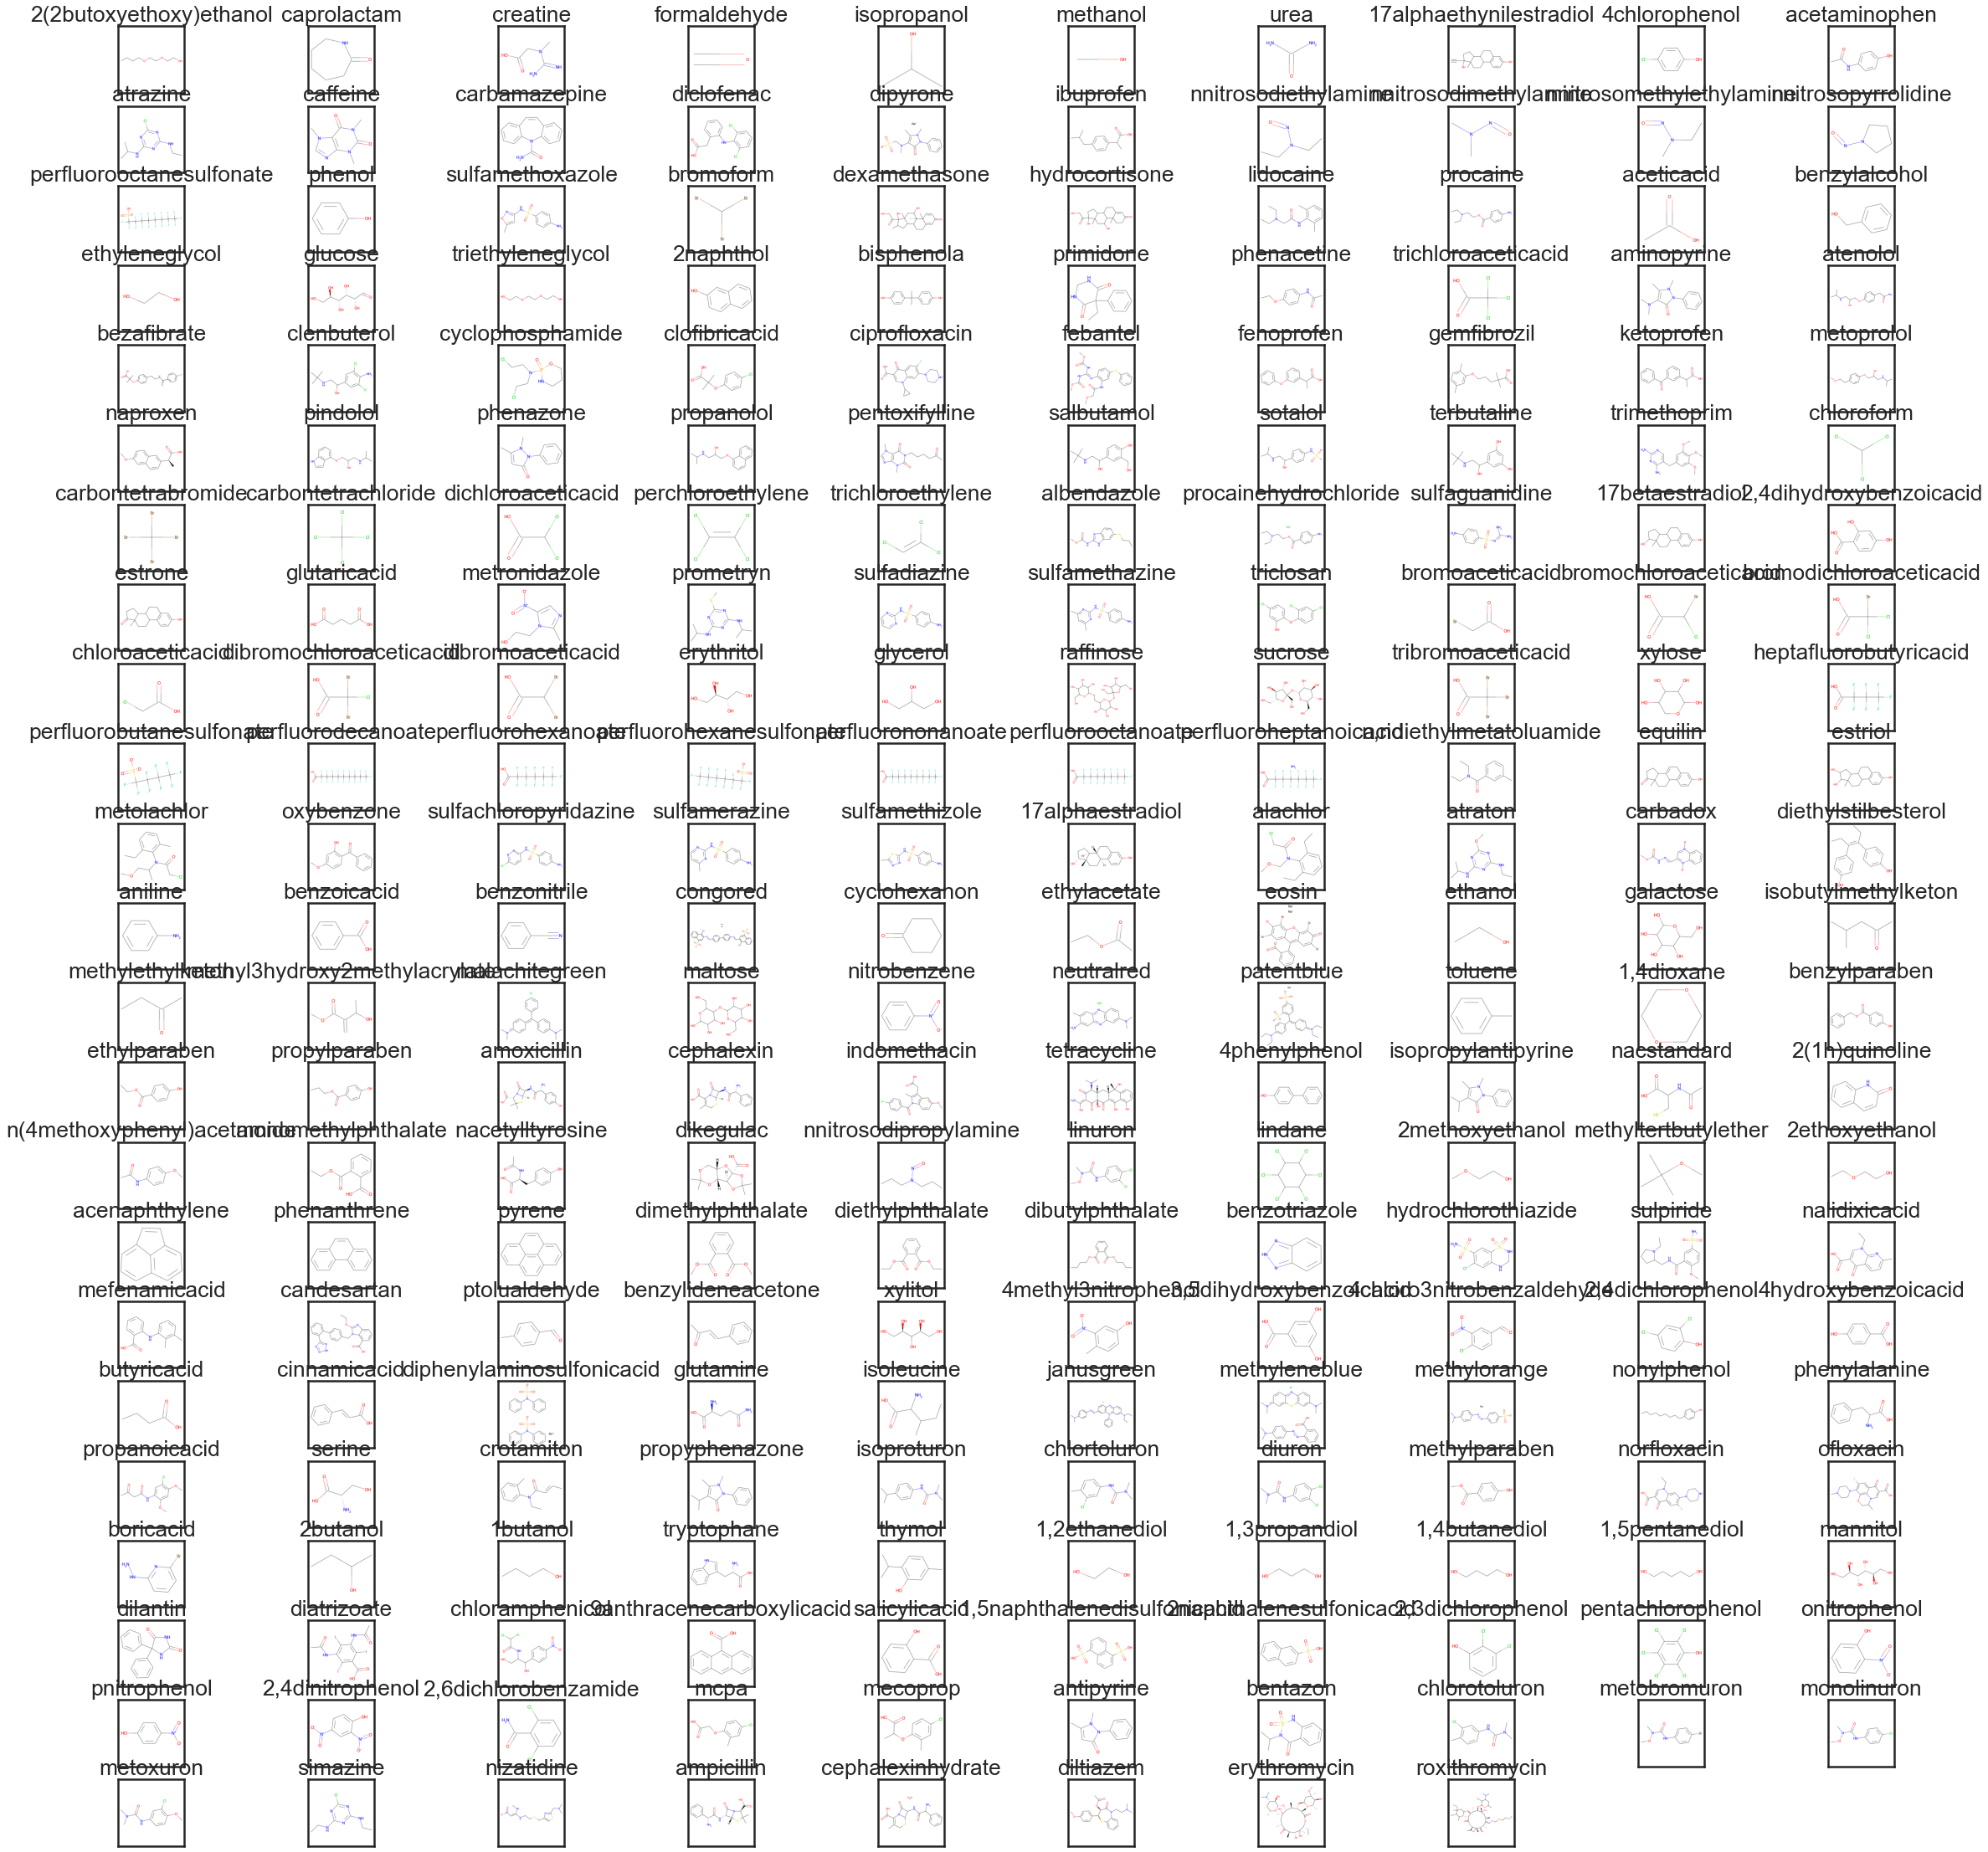

meta NOT subset; don't know how to subset; dropped


In [4]:
fig = plt.figure(figsize=(40,40))

for i in range(len(df_1)):
    m = Chem.MolFromSmiles(df_1['SMILES'].iloc[i])
    Draw.MolToFile(m,'mol.png', size=(600, 600))
#     Draw.MolToFile(m, 'mol.svg', size=(600, 600))
#     cairosvg.svg2png(url='mol.svg', write_to='mo.png')
#     img = Image.open('mol.svg')
    img = mpimg.imread('mol.png')
    #print(img)
    ax = fig.add_subplot(23,10,i+1)
    ax.imshow(img)
    ax.set_title(df_1['compound'].iloc[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)  
plt.show()

fig.savefig("report.pdf", bbox_inches='tight', transparent=True, dpi='figure')

In [4]:
plt.clf()
plt.interactive('off')
fig = plt.figure(figsize=(8.27, 11.69)) #A4 size
pdf_pages = PdfPages('report.pdf')

for i, m in enumerate(mols[:5]):
    ax1 = plt.subplot2grid((5,3),(i,0))
    im1 = im1.resize((400,400))
    ax1.imshow(im1, interpolation="catrom")
    ax1.get_xaxis().set_visible(False)
    ax1.get_yaxis().set_visible(False)  
    
pdf_pages.savefig(fig, dpi=200)
pdf_pages.close()

NameError: name 'mols' is not defined

<Figure size 432x288 with 0 Axes>

<Figure size 595.44x841.68 with 0 Axes>

# Previous dataset

In [53]:
df_ori = pd.read_csv('compound_rejections_2.csv')

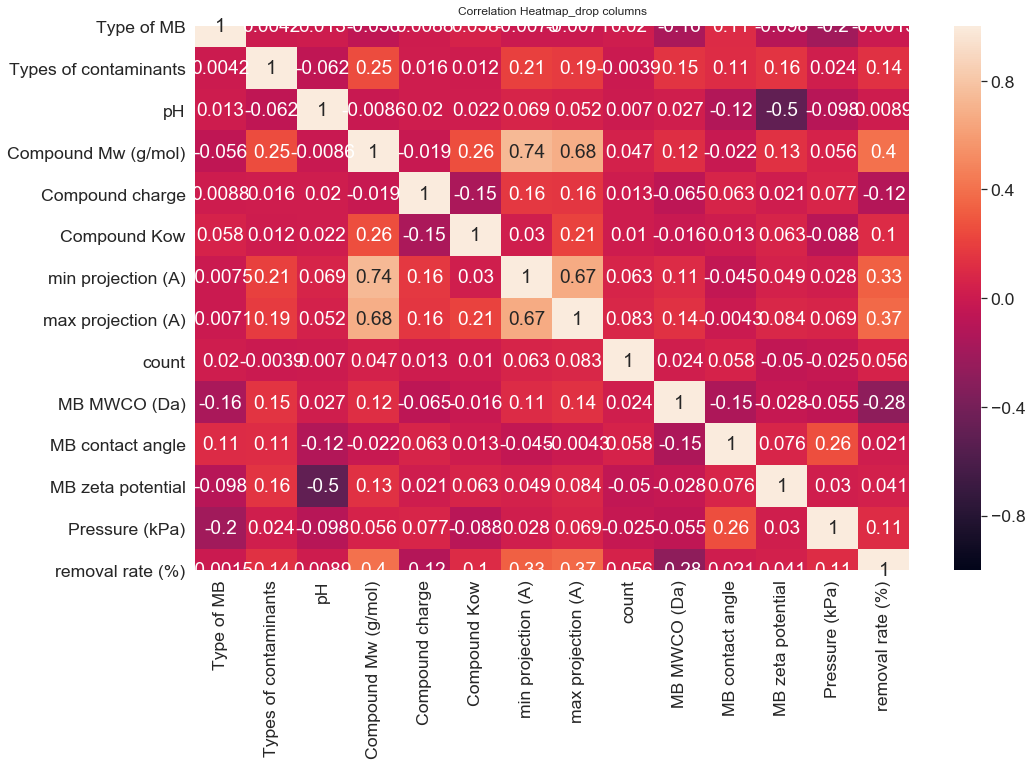

In [54]:
selected_columns = df_ori[['Type of MB', 'Types of contaminants', 'pH', 'Compound Mw (g/mol)', 'Compound charge', 'Compound Kow', 'min projection (A)', 'max projection (A)', 'count', 'MB MWCO (Da)', 'MB contact angle', 'MB zeta potential', 'Pressure (kPa)', 'removal rate (%)']]
df_2_copy = selected_columns.copy()

label_encoder_1 = LabelEncoder()
df_2_copy['Type of MB'] = label_encoder_1.fit_transform(df_2_copy['Type of MB'])
label_encoder_2 = LabelEncoder()
df_2_copy['Types of contaminants'] = label_encoder_1.fit_transform(df_2_copy['Types of contaminants'])

plt.figure(figsize=(16,10))
sns.set(font_scale=1.6)
heatmap = sns.heatmap(df_2_copy.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap_drop columns', fontdict={'fontsize':12}, pad=12);
plt.show()

In [55]:
df_ori = df_ori[df_ori['removal rate (%)'] >= 80]

In [4]:
y_data = df_ori['removal rate (%)']
x_data = df_ori.copy()
x_data.drop(columns=['removal rate (%)'], inplace=True)

NameError: name 'df_ori' is not defined

In [57]:
power = PowerTransformer(standardize=True)
y_data_trans = power.fit_transform(y_data.values.reshape(-1, 1))

In [58]:
x_data

Type of MB      Types of contaminants   pH  Compound Mw (g/mol)  \
0            AK  2-(2-Butoxyethoxy)ethanol  7.0              162.229   
1            AK                Caprolactam  7.0              113.160   
2            AK                   Creatine  7.0              131.135   
7          BW30   17alpha-Ethynilestradiol  7.0              296.410   
8          BW30             4-Chlorophenol  7.0              128.560   
...         ...                        ...  ...                  ...   
1901      ESPA1               Indomethacin  7.0              357.790   
1902      ESPA1         Cephalexin hydrate  7.0              347.390   
1903      ESPA1                  Diltiazem  7.0              414.520   
1904      ESPA1               Erythromycin  7.0              733.937   
1905      ESPA1              Roxithromycin  7.0              837.058   

      Compound charge  Compound Kow  min projection (A)  max projection (A)  \
0              0.0000         0.711                3.25                8.08   
1              0.0000         0.310                3.92                4.01   
2              0.0000        -2.864                3.35                4.36   
7              0.0000         4.330                4.44                7.20   
8             -0.0108         2.274                3.39                4.57   
...               ...           ...                 ...                 ...   
1901          -1.0000         3.530                5.24                8.54   
1902          -0.3711        -2.142                4.74                6.38   
1903           0.9374         2.727                6.13                8.50   
1904           1.0000         2.596                6.83                9.32   
1905           0.9918         3.000                9.12               10.83   

      count  MB MWCO (Da)  MB contact angle  MB zeta potential  Total charge  \
0      18.0           150              50.0               -1.0        0.0000   
1      17.0           150              50.0               -1.0        0.0000   
2      20.0           150              50.0               -1.0        0.0000   
7      43.0           100              76.0               -1.0        0.0000   
8      13.0           100              76.0               -1.0        0.0108   
...     ...           ...               ...                ...           ...   
1901    NaN           200              22.6               -1.0        1.0000   
1902    NaN           200              22.6               -1.0        0.3711   
1903    NaN           200              22.6               -1.0       -0.9374   
1904    NaN           200              22.6               -1.0       -1.0000   
1905    NaN           200              22.6               -1.0       -0.9918   

      Pressure (kPa)  Measurement time (min)  \
0              800.0                    10.0   
1              800.0                    10.0   
2              800.0                    10.0   
7             2000.0                    10.0   
8             2000.0                    10.0   
...              ...                     ...   
1901           500.0                  1440.0   
1902           500.0                  1440.0   
1903           500.0                  1440.0   
1904           500.0                  1440.0   
1905           500.0                  1440.0   

      Initial concentration of compound (mg/L)  compound size (nm)  
0                                      0.16223               0.512  
1                                      0.11316               0.396  
2                                      0.13114               0.382  
7                                      1.48205               0.565  
8                                      0.64280               0.394  
...                                        ...                 ...  
1901                                   0.02000               0.669  
1902                                   0.02000               0.550  
1903                            

In [43]:
le_mem_type = LabelEncoder()
x_data.iloc[:,0] = le_mem_type.fit_transform(x_data.iloc[:,0])
le_con_type = LabelEncoder()
x_data.iloc[:,1] = le_mem_type.fit_transform(x_data.iloc[:,1])

scaler_mem_type = preprocessing.MinMaxScaler()
scaler_con_type = preprocessing.MinMaxScaler()
scaler_pH = preprocessing.MinMaxScaler()
scaler_MW = preprocessing.MinMaxScaler()
scaler_char = preprocessing.MinMaxScaler()
scaler_Kow = preprocessing.MinMaxScaler()
scaler_min = preprocessing.MinMaxScaler()
scaler_max = preprocessing.MinMaxScaler()
scaler_cnt = preprocessing.MinMaxScaler()
scaler_MWCO = preprocessing.MinMaxScaler()
scaler_CA = preprocessing.MinMaxScaler()
scaler_zeta = preprocessing.MinMaxScaler()
scaler_total = preprocessing.MinMaxScaler()
scaler_kPa = preprocessing.MinMaxScaler()
scaler_time = preprocessing.MinMaxScaler()
scaler_conc = preprocessing.MinMaxScaler()
scaler_removal = preprocessing.MinMaxScaler()

scaler_mem_type.fit(x_data.loc[:,'Type of MB'].values.reshape(-1,1))
temp_0 = scaler_mem_type.transform(x_data.loc[:,'Type of MB'].values.reshape(-1,1))
scaler_con_type.fit(x_data.loc[:,'Types of contaminants'].values.reshape(-1,1))
temp_1 = scaler_con_type.transform(x_data.loc[:,'Types of contaminants'].values.reshape(-1,1))
scaler_pH.fit(x_data.loc[:,'pH'].values.reshape(-1,1))
temp_2 = scaler_pH.transform(x_data.loc[:,'pH'].values.reshape(-1,1))
scaler_MWCO.fit(x_data.loc[:,'MB MWCO (Da)'].values.reshape(-1,1))
temp_3 = scaler_MWCO.transform(x_data.loc[:,'MB MWCO (Da)'].values.reshape(-1,1))
scaler_CA.fit(x_data.loc[:,'MB contact angle'].values.reshape(-1,1))
temp_4 = scaler_CA.transform(x_data.loc[:,'MB contact angle'].values.reshape(-1,1))
scaler_zeta.fit(x_data.loc[:,'MB zeta potential'].values.reshape(-1,1))
temp_5 = scaler_zeta.transform(x_data.loc[:,'MB zeta potential'].values.reshape(-1,1))
scaler_kPa.fit(x_data.loc[:,'Pressure (kPa)'].values.reshape(-1,1))
temp_6 = scaler_kPa.transform(x_data.loc[:,'Pressure (kPa)'].values.reshape(-1,1))
scaler_removal.fit(y_data_trans)
temp_7 = scaler_removal.transform(y_data_trans)

scaler_MW.fit(x_data.loc[:,'Compound Mw (g/mol)'].values.reshape(-1,1))
temp_8 = scaler_MW.transform(x_data.loc[:,'Compound Mw (g/mol)'].values.reshape(-1,1))
scaler_char.fit(x_data.loc[:,'Compound charge'].values.reshape(-1,1))
temp_9 = scaler_char.transform(x_data.loc[:,'Compound charge'].values.reshape(-1,1))
scaler_Kow.fit(x_data.loc[:,'Compound Kow'].values.reshape(-1,1))
temp_10 = scaler_Kow.transform(x_data.loc[:,'Compound Kow'].values.reshape(-1,1))
scaler_min.fit(x_data.loc[:,'min projection (A)'].values.reshape(-1,1))
temp_11 = scaler_min.transform(x_data.loc[:,'min projection (A)'].values.reshape(-1,1))
scaler_max.fit(x_data.loc[:,'max projection (A)'].values.reshape(-1,1))
temp_12 = scaler_max.transform(x_data.loc[:,'max projection (A)'].values.reshape(-1,1))
scaler_cnt.fit(x_data.loc[:,'count'].values.reshape(-1,1))
temp_13 = scaler_cnt.transform(x_data.loc[:,'count'].values.reshape(-1,1))
scaler_total.fit(x_data.loc[:,'Total charge'].values.reshape(-1,1))
temp_14 = scaler_total.transform(x_data.loc[:,'Total charge'].values.reshape(-1,1))
scaler_time.fit(x_data.loc[:,'Measurement time (min)'].values.reshape(-1,1))
temp_15 = scaler_time.transform(x_data.loc[:,'Measurement time (min)'].values.reshape(-1,1))
scaler_conc.fit(x_data.loc[:,'Initial concentration of compound (mg/L)'].values.reshape(-1,1))
temp_16 = scaler_conc.transform(x_data.loc[:,'Initial concentration of compound (mg/L)'].values.reshape(-1,1))


x_data_scaled = pd.DataFrame()
y_data_scaled = pd.DataFrame()

x_data_scaled['Type of MB'] = temp_0.reshape(1,-1).tolist()[0]
x_data_scaled['Types of contaminants'] = temp_1.reshape(1,-1).tolist()[0]
x_data_scaled['pH'] = temp_2.reshape(1,-1).tolist()[0]
x_data_scaled['MB MWCO (Da)'] = temp_3.reshape(1,-1).tolist()[0]
x_data_scaled['MB contact angle'] = temp_4.reshape(1,-1).tolist()[0]
x_data_scaled['MB zeta potential'] = temp_5.reshape(1,-1).tolist()[0]
x_data_scaled['Pressure (kPa)'] = temp_6.reshape(1,-1).tolist()[0]
y_data_scaled = temp_7.reshape(1,-1).tolist()[0]

x_data_scaled['Compound Mw (g/mol)'] = temp_8.reshape(1,-1).tolist()[0]
x_data_scaled['Compound charge'] = temp_9.reshape(1,-1).tolist()[0]
x_data_scaled['Compound Kow'] = temp_10.reshape(1,-1).tolist()[0]
x_data_scaled['min projection (A)'] = temp_11.reshape(1,-1).tolist()[0]
x_data_scaled['max projection (A)'] = temp_12.reshape(1,-1).tolist()[0]
x_data_scaled['count'] = temp_13.reshape(1,-1).tolist()[0]
x_data_scaled['Total charge'] = temp_14.reshape(1,-1).tolist()[0]
x_data_scaled['Measurement time (min)'] = temp_15.reshape(1,-1).tolist()[0]
x_data_scaled['Initial concentration of compound (mg/L)'] = temp_16.reshape(1,-1).tolist()[0]

In [45]:
x_data_scaled

Type of MB  Types of contaminants        pH  MB MWCO (Da)  \
0       0.000000               0.069869  0.545455      0.215190   
1       0.000000               0.257642  0.545455      0.215190   
2       0.000000               0.331878  0.545455      0.215190   
3       0.000000               0.475983  0.545455      0.215190   
4       0.000000               0.537118  0.545455      0.215190   
...          ...                    ...       ...           ...   
1901    0.342105               0.524017  0.545455      0.341772   
1902    0.342105               0.283843  0.545455      0.341772   
1903    0.342105               0.397380  0.545455      0.341772   
1904    0.342105               0.432314  0.545455      0.341772   
1905    0.342105               0.834061  0.545455      0.341772   

      MB contact angle  MB zeta potential  Pressure (kPa)  \
0             0.547692                0.0        0.171779   
1             0.547692                0.0        0.171779   
2             0.547692                0.0        0.171779   
3             0.547692                0.0        0.171779   
4             0.547692                0.0        0.171779   
...                ...                ...             ...   
1901          0.126154                0.0        0.079755   
1902          0.126154                0.0        0.079755   
1903          0.126154                0.0        0.079755   
1904          0.126154                0.0        0.079755   
1905          0.126154                0.0        0.079755   

      Compound Mw (g/mol)  Compound charge  Compound Kow  min projection (A)  \
0                0.163814         0.522452      0.547136            0.166193   
1                0.103012         0.522452      0.515842            0.261364   
2                0.125285         0.522452      0.268144            0.180398   
3                0.000000         0.522452      0.455205            0.000000   
4                0.037260         0.522452      0.511550            0.123580   
...                   ...              ...           ...                 ...   
1901             0.406135         0.261226      0.767130            0.448864   
1902             0.393248         0.425511      0.324489            0.377841   
1903             0.476430         0.767326      0.704464            0.575284   
1904             0.872222         0.783679      0.694241            0.674716   
1905             1.000000         0.781537      0.725769            1.000000   

      max projection (A)  Total charge  Measurement time (min)  \
0               0.483572      0.499512                0.000000   
1               0.140691      0.499512                0.000000   
2               0.170177      0.499512                0.000000   
3               0.000000      0.499512                0.000000   
4               0.085931      0.499512                0.000000   
...                  ...           ...                     ...   
1901            0.522325      0.749756                0.248696   
1902            0.340354      0.592378                0.248696   
1903            0.518955      0.264933                0.248696   
1904            0.588037      0.249268                0.248696   
1905            0.715249      0.251320                0.248696   

      Initial concentration of compound (mg/L)  
0                                     0.000081  
1                                     0.000056  
2                                     0.000065  
3                                     0.000015  
4                                     0.000030  
...                                        ...  
1901                                  0.000010  
1902                                  0.000010  
1903                                  0.000010  
1904                                  0.000010  
1905                                  0.000010  

[1906 rows x 15 columns]

0.6944133524702487


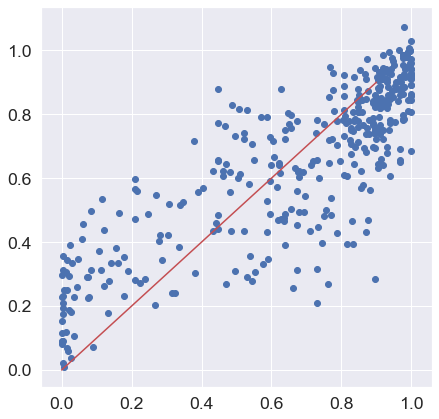

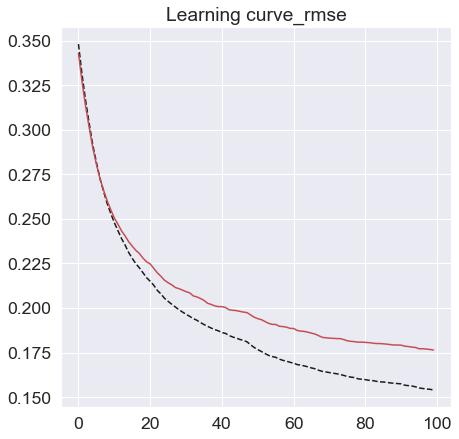

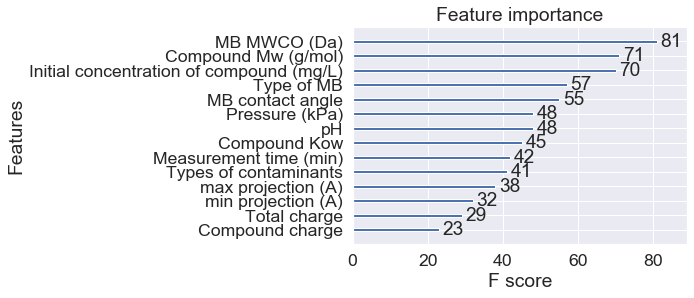

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x_data_scaled, y_data_scaled, test_size=0.2, random_state=3)

model_CA_1 = XGBRegressor(objective = 'reg:squarederror')
#model_CA_1 = XGBClassifier()
evaluation = [(x_train, y_train), (x_test, y_test)]
model_CA_1.fit(x_train, y_train, eval_set = evaluation, eval_metric = "rmse", early_stopping_rounds=10, verbose=False)
# model_CA_1.fit(x_train, y_train)
pred_CA_1 = model_CA_1.predict(x_test)

print(r2_score(y_test, pred_CA_1))

# print(accuracy_score(y_test, pred_CA_1))
# print(precision_score(y_test, pred_CA_1, average='macro'))
# print(recall_score(y_test, pred_CA_1, average='macro'))
# print(classification_report(y_test, pred_CA_1))

plt.figure(figsize=(7,7))
plt.scatter(y_test, pred_CA_1)
plt.plot(np.arange(0, 1.0, 0.1), np.arange(0, 1.0, 0.1), 'r-')
plt.show()

results = model_CA_1.evals_result()
plt.figure(figsize=(7,7))
plt.title('Learning curve_rmse')
plt.plot(results['validation_0']['rmse'], 'k--') #train
plt.plot(results['validation_1']['rmse'], 'r-') #test
plt.show()

xgb.plot_importance(model_CA_1)

# Build a model

In [43]:
# Rdkit 2048 (path length 7)
#df_2 = pd.read_csv('df_fin_2048.csv')
df_2 = pd.read_csv('df_fin_path_32768_3_fin.csv')
#df_2 = pd.read_csv('df_fin_path_1024_1_fin.csv')
#df_2 = pd.read_csv('df_fin_path_2048_7_short.csv')

In [24]:
# Morgan 2048 (radius 7)
#df_2 = pd.read_csv('df_fin_morgan_4096_1_fin.csv')
df_2 = pd.read_csv('df_fin_morgan_16384_3_fin.csv')

In [4]:
# PubChem 881
df_2 = pd.read_csv('df_fin_PubChem_new.csv')

In [5]:
# MACCS 166
#df_2 = pd.read_csv('df_fin_MACCS.csv')
df_2 = pd.read_csv('df_fin_MACCS_new.csv')

In [228]:
# Avalon 2048
df_2 = pd.read_csv('df_fin_Avalon_new.csv')

In [156]:
df_2 = pd.read_csv('0514_test_4.csv')

In [6]:
df_2

Type of MB    Types of contaminants   pH  MB MWCO (Da)  MB contact angle  \
0            AK  2(2butoxyethoxy)ethanol  7.0           150              50.0   
1            AK              caprolactam  7.0           150              50.0   
2            AK                 creatine  7.0           150              50.0   
3            AK             formaldehyde  7.0           150              50.0   
4            AK              isopropanol  7.0           150              50.0   
...         ...                      ...  ...           ...               ...   
1901     XLE440        trichloroethylene  8.0           150              39.8   
1902     XLE440               chloroform  8.0           150              39.8   
1903     XLE440      carbontetrachloride  8.0           150              39.8   
1904     XLE440        perchloroethylene  8.0           150              39.8   
1905     XLE440       carbontetrabromide  8.0           150              39.8   

      Pressure (kPa)  Measurement time (min)  \
0              800.0                    10.0   
1              800.0                    10.0   
2              800.0                    10.0   
3              800.0                    10.0   
4              800.0                    10.0   
...              ...                     ...   
1901           410.0                  2880.0   
1902           410.0                    10.0   
1903           410.0                    10.0   
1904           410.0                    10.0   
1905           410.0                    10.0   

      Initial concentration of compound (mg/L)  removal rate (%)  1  ...  158  \
0                                      0.16223             81.59  0  ...    1   
1                                      0.11316             82.85  0  ...    0   
2                                      0.13114             96.65  0  ...    1   
3                                      0.03003              3.35  0  ...    0   
4                                      0.06010             65.27  0  ...    1   
...                                        ...               ... ..  ...  ...   
1901                                   0.10000              3.00  0  ...    0   
1902                                   0.10000             10.00  0  ...    0   
1903                                   0.10000             69.00  0  ...    0   
1904                                   0.10000             71.00  0  ...    0   
1905                                   0.10000             83.00  0  ...    0   

      159  160  161  162  163  164  165  166  167  
0       0    1    1    0    0    0    1    0    0  
1       1    0    0    1    0    0    1    1    0  
2       1    1    1    1    0    0    1    0    0  
3       0    0    0    0    0    0    1    0    0  
4       0    0    1    0    0    0    1    0    0  
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  
1901    0    0    0    0    0    0    0    0    0  
1902    0    0    0    0    0    0    0    0    0  
1903    0    0    0    0    0    0    0    0    0  
1904    0    0    0    0    0    0    0    0    0  
1905    0    0    0    0    0    0    0    0    0  

[1906 rows x 176 columns]

In [5]:
#df_drop = df.drop(columns=['id', 'name', 'reportTitle', 'reportYear', 'reportAuthor', 'structureOther', 'chemistryOther', 'modificationOther', 'characterization', 'otherSolutes', 'couponSize', 'otherSolutesDetails', 'pwPs'])
selected_columns = df_2[['Type of MB', 'Types of contaminants', 'pH', 'MB MWCO (Da)', 'MB contact angle', 'MB zeta potential', 'Pressure (kPa)', 'Initial concentration of compound (mg/L)', 'removal rate (%)']]
df_2_copy = selected_columns.copy()

label_encoder_1 = LabelEncoder()
df_2_copy['Type of MB'] = label_encoder_1.fit_transform(df_2_copy['Type of MB'])
label_encoder_2 = LabelEncoder()
df_2_copy['Types of contaminants'] = label_encoder_1.fit_transform(df_2_copy['Types of contaminants'])

plt.figure(figsize=(16,10))
sns.set(font_scale=1.6)
heatmap = sns.heatmap(df_2_copy.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap_drop columns', fontdict={'fontsize':12}, pad=12);
plt.show()

KeyError: "['MB zeta potential'] not in index"

In [100]:
df_2['removal rate (%)'] = pd.cut(df_2['removal rate (%)'], bins=[-0.1, 40, 75, 85, 92, 96, 98, 100.1], labels=['1', '2', '3', '4', '5', '6', '7'])

In [101]:
df_2['removal rate (%)'].value_counts().sort_index()

1    254
2    273
3    220
4    255
5    312
6    158
7    315
Name: removal rate (%), dtype: int64

In [85]:
df_2 = df_2[df_2['removal rate (%)'] <= 80]

In [6]:
df_2.drop(labels=['Types of contaminants'], axis=1, inplace=True)
#df_2.drop(labels=['PCA_size'], axis=1, inplace=True)

In [7]:
y_data = df_2['removal rate (%)']
x_data = df_2.copy()
x_data.drop(columns=['removal rate (%)'], inplace=True)

In [46]:
#y_data_trans = y_data.values.reshape(-1, 1)

(array([  5.,   7.,   3.,   5.,   7.,   5.,  11.,   1.,   9.,   8.,   6.,
          6.,   4.,   4.,   8.,   9.,   7.,   8.,  10.,   8.,   4.,  12.,
          8.,   3.,   2.,   6.,   6.,   5.,   5.,   6.,   5.,  12.,   6.,
          7.,   3.,   2.,   4.,   7.,   9.,  11.,   3.,   5.,   7.,   4.,
         10.,   5.,   6.,   3.,   1.,   3.,  17.,   3.,   8.,   8.,   3.,
          8.,   4.,   8.,   2.,   7.,   8.,   7.,   8.,   1.,   5.,  10.,
          6.,   2.,  10.,  14.,  18.,  15.,  16.,  18.,  15.,  21.,  17.,
         12.,  25.,  18.,  17.,  32.,  31.,  31.,  29.,  16.,  32.,  31.,
         33.,  49.,  45.,  45.,  65.,  78.,  79., 107., 106., 105.,  88.,
        272.]),
 array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
         11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
         22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
         33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
         44.,  45.,  4

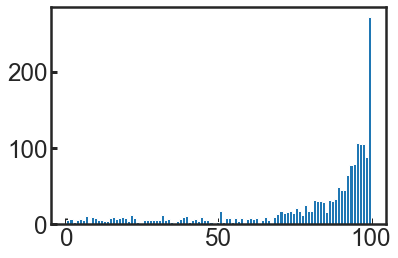

In [8]:
plt.hist(y_data, bins=100)

In [9]:
y_data_trans = y_data/100
#y_data_trans = y_data

In [49]:
# # for i in range(len(y_data_trans)):
# #     if y_data_trans[i] == 0.0:
# #         y_data_trans[i] = 0.01
# #     if y_data_trans[i] >= 99.99:
# #         y_data_trans[i] = 99.99
        
# for i in range(len(y_data_trans)):
#     if y_data_trans[i] == 0.000:
#         y_data_trans[i] = 0.0001
#     if y_data_trans[i] >= 0.9999:
#         y_data_trans[i] = 0.9999
# #     if y_data_trans[i] == 1.0:
# #         y_data_trans[i] = 1.0 - np.absolute(np.random.normal(0.01, 0.005, 1))

In [10]:
#y_data_trans = np.log10(100-y_data_trans)
#y_data_trans = -np.log(1-y_data_trans)
#y_data_trans = np.log(1+y_data_trans)
y_data_trans = -np.sqrt(1-y_data_trans)
#y_data_trans = -np.cbrt(1-y_data_trans)
#y_data_trans = y_data_trans**3

(array([12.,  8., 12., 12., 16., 10., 10., 15., 15., 13., 12., 18.,  5.,
        10.,  6., 10., 14., 13., 10.,  2.,  9., 18.,  6.,  9.,  7., 14.,
         8.,  3.,  1., 20.,  9.,  9.,  8.,  6.,  9.,  6.,  5., 10., 11.,
         2.,  9.,  8.,  6.,  6., 16., 17., 18., 15., 19., 15., 21., 17.,
        12., 24., 17., 16., 24., 27., 27., 19., 26., 13., 19., 32., 10.,
        25., 37., 19., 32., 22., 34., 26., 34., 43., 30., 51., 31., 55.,
        36., 61., 31., 25., 56., 30., 26., 25., 15., 19., 19., 43., 31.,
        36., 31., 33., 18., 21.,  6.,  3.,  6., 70.]),
 array([-1.  , -0.99, -0.98, -0.97, -0.96, -0.95, -0.94, -0.93, -0.92,
        -0.91, -0.9 , -0.89, -0.88, -0.87, -0.86, -0.85, -0.84, -0.83,
        -0.82, -0.81, -0.8 , -0.79, -0.78, -0.77, -0.76, -0.75, -0.74,
        -0.73, -0.72, -0.71, -0.7 , -0.69, -0.68, -0.67, -0.66, -0.65,
        -0.64, -0.63, -0.62, -0.61, -0.6 , -0.59, -0.58, -0.57, -0.56,
        -0.55, -0.54, -0.53, -0.52, -0.51, -0.5 , -0.49, -0.48, -0.47,
        

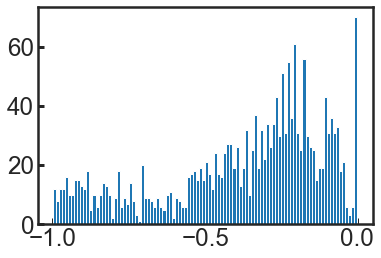

In [11]:
#scaler = preprocessing.MinMaxScaler()
#scaler.fit(b.values.reshape(-1,1))
#temp = scaler.transform(b.values.reshape(-1,1))
plt.hist(y_data_trans, bins=100)

In [12]:
y_data_trans.agg(['skew', 'kurtosis']).transpose()

skew       -0.744597
kurtosis   -0.455850
Name: removal rate (%), dtype: float64

In [13]:
y_data_trans = y_data_trans.values.reshape(-1, 1)
#y_data_trans = y_data.values.reshape(-1, 1)

In [29]:
le_mem_name = LabelEncoder()
x_data.loc[:,'Type of MB'] = le_mem_name.fit_transform(x_data.loc[:,'Type of MB'])
le_mem_type = LabelEncoder()
x_data.loc[:,'mem_material'] = le_mem_type.fit_transform(x_data.loc[:,'mem_material'])
# le_con_type = LabelEncoder()
# x_data.iloc[:,1] = le_mem_type.fit_transform(x_data.iloc[:,1])

scaler_mem_name = preprocessing.MinMaxScaler()
scaler_PCA_size = preprocessing.MinMaxScaler()
scaler_pH = preprocessing.MinMaxScaler()
scaler_MWCO = preprocessing.MinMaxScaler()
scaler_CA = preprocessing.MinMaxScaler()
#scaler_zeta = preprocessing.MinMaxScaler()
#scaler_kPa = preprocessing.MinMaxScaler()
#scaler_conc = preprocessing.MinMaxScaler()
scaler_removal = preprocessing.MinMaxScaler()

scaler_mem_name.fit(x_data.loc[:,'Type of MB'].values.reshape(-1,1))
temp_0 = scaler_mem_name.transform(x_data.loc[:,'Type of MB'].values.reshape(-1,1))
# scaler_PCA_size.fit(x_data.loc[:,'PCA_size'].values.reshape(-1,1))
# temp_1 = scaler_PCA_size.transform(x_data.loc[:,'PCA_size'].values.reshape(-1,1))
scaler_pH.fit(x_data.loc[:,'pH'].values.reshape(-1,1))
temp_2 = scaler_pH.transform(x_data.loc[:,'pH'].values.reshape(-1,1))
scaler_MWCO.fit(x_data.loc[:,'MB MWCO (Da)'].values.reshape(-1,1))
temp_3 = scaler_MWCO.transform(x_data.loc[:,'MB MWCO (Da)'].values.reshape(-1,1))
scaler_CA.fit(x_data.loc[:,'MB contact angle'].values.reshape(-1,1))
temp_4 = scaler_CA.transform(x_data.loc[:,'MB contact angle'].values.reshape(-1,1))
# scaler_zeta.fit(x_data.loc[:,'MB zeta potential'].values.reshape(-1,1))
# temp_5 = scaler_zeta.transform(x_data.loc[:,'MB zeta potential'].values.reshape(-1,1))
# scaler_kPa.fit(x_data.loc[:,'Pressure (kPa)'].values.reshape(-1,1))
# temp_6 = scaler_kPa.transform(x_data.loc[:,'Pressure (kPa)'].values.reshape(-1,1))
# scaler_conc.fit(x_data.loc[:,'Initial concentration of compound (mg/L)'].values.reshape(-1,1))
# temp_7 = scaler_conc.transform(x_data.loc[:,'Initial concentration of compound (mg/L)'].values.reshape(-1,1))
#scaler_removal.fit(y_data_trans)
#temp_8 = scaler_removal.transform(y_data_trans)

x_data_scaled = pd.DataFrame()
y_data_scaled = pd.DataFrame()

x_data_scaled['Type of MB'] = temp_0.reshape(1,-1).tolist()[0]
# x_data_scaled['PCA_size'] = temp_1.reshape(1,-1).tolist()[0]
x_data_scaled['pH'] = temp_2.reshape(1,-1).tolist()[0]
x_data_scaled['MB MWCO (Da)'] = temp_3.reshape(1,-1).tolist()[0]
x_data_scaled['MB contact angle'] = temp_4.reshape(1,-1).tolist()[0]
#x_data_scaled['MB zeta potential'] = temp_5.reshape(1,-1).tolist()[0]
#x_data_scaled['Pressure (kPa)'] = temp_6.reshape(1,-1).tolist()[0]
#x_data_scaled['Initial concentration of compound (mg/L)'] = temp_7.reshape(1,-1).tolist()[0]
#y_data_scaled = temp_8.reshape(1,-1).tolist()[0]
y_data_scaled = y_data_trans.reshape(1,-1).tolist()[0]

KeyError: 'mem_material'

In [14]:
le_mem_name = LabelEncoder()
x_data.loc[:,'Type of MB'] = le_mem_name.fit_transform(x_data.loc[:,'Type of MB'])

scaler_mem_name = preprocessing.MinMaxScaler()
scaler_pH = preprocessing.MinMaxScaler()
scaler_MWCO = preprocessing.MinMaxScaler()
scaler_CA = preprocessing.MinMaxScaler()
scaler_pressure = preprocessing.MinMaxScaler()
scaler_time = preprocessing.MinMaxScaler()
scaler_init = preprocessing.MinMaxScaler()
scaler_removal = preprocessing.MinMaxScaler()
#scaler_removal = preprocessing.StandardScaler()

scaler_mem_name.fit(x_data.loc[:,'Type of MB'].values.reshape(-1,1))
temp_0 = scaler_mem_name.transform(x_data.loc[:,'Type of MB'].values.reshape(-1,1))
scaler_pressure.fit(x_data.loc[:,'Pressure (kPa)'].values.reshape(-1,1))
temp_1 = scaler_pressure.transform(x_data.loc[:,'Pressure (kPa)'].values.reshape(-1,1))
scaler_pH.fit(x_data.loc[:,'pH'].values.reshape(-1,1))
temp_2 = scaler_pH.transform(x_data.loc[:,'pH'].values.reshape(-1,1))
scaler_MWCO.fit(x_data.loc[:,'MB MWCO (Da)'].values.reshape(-1,1))
temp_3 = scaler_MWCO.transform(x_data.loc[:,'MB MWCO (Da)'].values.reshape(-1,1))
scaler_CA.fit(x_data.loc[:,'MB contact angle'].values.reshape(-1,1))
temp_4 = scaler_CA.transform(x_data.loc[:,'MB contact angle'].values.reshape(-1,1))
scaler_time.fit(x_data.loc[:,'Measurement time (min)'].values.reshape(-1,1))
temp_5 = scaler_time.transform(x_data.loc[:,'Measurement time (min)'].values.reshape(-1,1))
scaler_init.fit(x_data.loc[:,'Initial concentration of compound (mg/L)'].values.reshape(-1,1))
temp_6 = scaler_init.transform(x_data.loc[:,'Initial concentration of compound (mg/L)'].values.reshape(-1,1))
scaler_removal.fit(y_data_trans)
temp_8 = scaler_removal.transform(y_data_trans)
#temp_8 = y_data_trans

x_data_scaled = pd.DataFrame()
y_data_scaled = pd.DataFrame()

x_data_scaled['Type of MB'] = temp_0.reshape(1,-1).tolist()[0]
x_data_scaled['Pressure (kPa)'] = temp_1.reshape(1,-1).tolist()[0]
x_data_scaled['pH'] = temp_2.reshape(1,-1).tolist()[0]
x_data_scaled['MB MWCO (Da)'] = temp_3.reshape(1,-1).tolist()[0]
x_data_scaled['MB contact angle'] = temp_4.reshape(1,-1).tolist()[0]
x_data_scaled['Measurement time (min)'] = temp_5.reshape(1,-1).tolist()[0]
x_data_scaled['Initial concentration of compound (mg/L)'] = temp_6.reshape(1,-1).tolist()[0]
y_data_scaled = temp_8.reshape(1,-1).tolist()[0]
#y_data_scaled = y_data_trans

In [15]:
x_data.reset_index(drop=True, inplace=True)

In [16]:
x_data_scaled = pd.concat([x_data_scaled, x_data.iloc[:, 7:]], axis=1)

In [17]:
x_data_scaled

Type of MB  Pressure (kPa)        pH  MB MWCO (Da)  MB contact angle  \
0            0.0        0.171779  0.545455       0.21519          0.547692   
1            0.0        0.171779  0.545455       0.21519          0.547692   
2            0.0        0.171779  0.545455       0.21519          0.547692   
3            0.0        0.171779  0.545455       0.21519          0.547692   
4            0.0        0.171779  0.545455       0.21519          0.547692   
...          ...             ...       ...           ...               ...   
1901         1.0        0.052147  0.659091       0.21519          0.390769   
1902         1.0        0.052147  0.659091       0.21519          0.390769   
1903         1.0        0.052147  0.659091       0.21519          0.390769   
1904         1.0        0.052147  0.659091       0.21519          0.390769   
1905         1.0        0.052147  0.659091       0.21519          0.390769   

      Measurement time (min)  Initial concentration of compound (mg/L)  1  2  \
0                    0.00000                                  0.000081  1  1   
1                    0.00000                                  0.000056  1  1   
2                    0.00000                                  0.000065  1  1   
3                    0.00000                                  0.000015  0  0   
4                    0.00000                                  0.000030  1  1   
...                      ...                                       ... .. ..   
1901                 0.49913                                  0.000050  0  0   
1902                 0.00000                                  0.000050  0  0   
1903                 0.00000                                  0.000050  0  0   
1904                 0.00000                                  0.000050  0  0   
1905                 0.00000                                  0.000050  0  0   

      3  ...  872  873  874  875  876  877  878  879  880  881  
0     1  ...    0    0    0    0    0    0    0    0    0    0  
1     0  ...    0    0    0    0    0    0    0    0    0    0  
2     0  ...    0    0    0    0    0    0    0    0    0    0  
3     0  ...    0    0    0    0    0    0    0    0    0    0  
4     0  ...    0    0    0    0    0    0    0    0    0    0  
...  ..  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  
1901  0  ...    0    0    0    0    0    0    0    0    0    0  
1902  0  ...    0    0    0    0    0    0    0    0    0    0  
1903  0  ...    0    0    0    0    0    0    0    0    0    0  
1904  0  ...    0    0    0    0    0    0    0    0    0    0  
1905  0  ...    0    0    0    0    0    0    0    0    0    0  

[1906 rows x 888 columns]

In [254]:
# Hyperparameter for fingerprint
# RDK fp 1024 -> 0.53
# RDK fp 2048 -> 0.51
# Morgan fp 1024 -> 0.41
# RDK fp 2048 -> 0.43

(array([12.,  8., 12., 12., 16., 10., 10., 15., 15., 15., 10., 18.,  5.,
        10.,  6., 10., 14., 13., 10.,  5.,  6., 18.,  6.,  9.,  7., 14.,
         8.,  3.,  1., 20.,  9.,  9.,  8.,  6.,  9.,  6.,  5., 10., 11.,
         2.,  9.,  8.,  6.,  6., 16., 17., 18., 15., 19., 15., 21., 17.,
        12., 24., 17., 16., 24., 27., 27., 19., 26., 13., 19., 32., 10.,
        25., 37., 19., 32., 22., 34., 26., 34., 43., 30., 51., 31., 55.,
        36., 61., 31., 25., 56., 30., 26., 25., 15., 19., 19., 43., 30.,
        37., 31., 33., 18., 21.,  6.,  3.,  6., 70.]),
 array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
        0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
        0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
        0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
        0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
        0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.

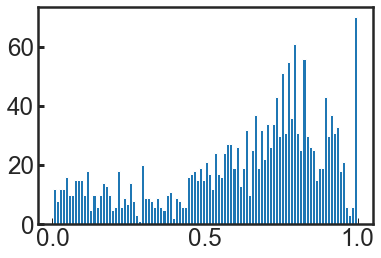

In [18]:
plt.hist(y_data_scaled, bins=100)

In [19]:
# stratified splits

mini = np.amin(y_data_scaled)
maxi = np.amax(y_data_scaled)
bins = np.linspace(start=mini, stop=maxi, num=5)
y_binned = np.digitize(y_data_scaled, bins, right=True)
x_train, x_test, y_train, y_test = train_test_split(x_data_scaled, y_data_scaled, test_size=0.2, random_state=6, stratify=y_binned)

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
Early stopping is not available in dart mode


[1]	training's rmse: 0.253406	training's huber: 0.0321074	valid_0's rmse: 0.2574	valid_0's huber: 0.0331275
[2]	training's rmse: 0.241133	training's huber: 0.0290727	valid_0's rmse: 0.245549	valid_0's huber: 0.0301471
[3]	training's rmse: 0.229949	training's huber: 0.0264382	valid_0's rmse: 0.23435	valid_0's huber: 0.0274599
[4]	training's rmse: 0.21991	training's huber: 0.0241802	valid_0's rmse: 0.224509	valid_0's huber: 0.0252022
[5]	training's rmse: 0.209983	training's huber: 0.0220463	valid_0's rmse: 0.214294	valid_0's huber: 0.0229609
[6]	training's rmse: 0.20228	training's huber: 0.0204587	valid_0's rmse: 0.206592	valid_0's huber: 0.0213402
[7]	training's rmse: 0.194497	training's huber: 0.0189146	valid_0's rmse: 0.198981	valid_0's huber: 0.0197968
[8]	training's rmse: 0.197589	training's huber: 0.0195207	valid_0's rmse: 0.201925	valid_0's huber: 0.0203869
[9]	training's rmse: 0.191311	training's huber: 0.0183	valid_0's rmse: 0.196035	valid_0's huber: 0.0192149
[10]	training's rm

[101]	training's rmse: 0.138474	training's huber: 0.00958751	valid_0's rmse: 0.154924	valid_0's huber: 0.0120007
[102]	training's rmse: 0.140635	training's huber: 0.00988908	valid_0's rmse: 0.156828	valid_0's huber: 0.0122974
[103]	training's rmse: 0.142886	training's huber: 0.0102082	valid_0's rmse: 0.158803	valid_0's huber: 0.0126092
[104]	training's rmse: 0.136105	training's huber: 0.00926226	valid_0's rmse: 0.152769	valid_0's huber: 0.0116692
[105]	training's rmse: 0.150754	training's huber: 0.0113633	valid_0's rmse: 0.166301	valid_0's huber: 0.013828
[106]	training's rmse: 0.152188	training's huber: 0.0115806	valid_0's rmse: 0.167523	valid_0's huber: 0.014032
[107]	training's rmse: 0.154696	training's huber: 0.0119654	valid_0's rmse: 0.169808	valid_0's huber: 0.0144173
[108]	training's rmse: 0.146406	training's huber: 0.0107173	valid_0's rmse: 0.162175	valid_0's huber: 0.0131504
[109]	training's rmse: 0.148098	training's huber: 0.0109666	valid_0's rmse: 0.163687	valid_0's huber: 0

[208]	training's rmse: 0.0950267	training's huber: 0.00451504	valid_0's rmse: 0.120352	valid_0's huber: 0.00724232
[209]	training's rmse: 0.096425	training's huber: 0.00464889	valid_0's rmse: 0.121419	valid_0's huber: 0.00737132
[210]	training's rmse: 0.0976887	training's huber: 0.00477154	valid_0's rmse: 0.122395	valid_0's huber: 0.00749023
[211]	training's rmse: 0.0991704	training's huber: 0.00491739	valid_0's rmse: 0.12358	valid_0's huber: 0.00763602
[212]	training's rmse: 0.0966411	training's huber: 0.00466975	valid_0's rmse: 0.121627	valid_0's huber: 0.00739661
[213]	training's rmse: 0.0942594	training's huber: 0.00444241	valid_0's rmse: 0.119549	valid_0's huber: 0.00714594
[214]	training's rmse: 0.0923485	training's huber: 0.00426412	valid_0's rmse: 0.118334	valid_0's huber: 0.00700144
[215]	training's rmse: 0.0906745	training's huber: 0.00411093	valid_0's rmse: 0.117235	valid_0's huber: 0.00687201
[216]	training's rmse: 0.091845	training's huber: 0.00421775	valid_0's rmse: 0.118

[289]	training's rmse: 0.0754842	training's huber: 0.00284893	valid_0's rmse: 0.108188	valid_0's huber: 0.00585227
[290]	training's rmse: 0.0748435	training's huber: 0.00280078	valid_0's rmse: 0.107751	valid_0's huber: 0.00580512
[291]	training's rmse: 0.0741899	training's huber: 0.00275207	valid_0's rmse: 0.107288	valid_0's huber: 0.00575536
[292]	training's rmse: 0.0749033	training's huber: 0.00280525	valid_0's rmse: 0.107745	valid_0's huber: 0.00580447
[293]	training's rmse: 0.0755616	training's huber: 0.00285478	valid_0's rmse: 0.108184	valid_0's huber: 0.00585185
[294]	training's rmse: 0.0748876	training's huber: 0.00280407	valid_0's rmse: 0.10774	valid_0's huber: 0.0058039
[295]	training's rmse: 0.0755364	training's huber: 0.00285288	valid_0's rmse: 0.108165	valid_0's huber: 0.00584979
[296]	training's rmse: 0.0762225	training's huber: 0.00290493	valid_0's rmse: 0.108615	valid_0's huber: 0.00589863
[297]	training's rmse: 0.0754581	training's huber: 0.00284696	valid_0's rmse: 0.10

[419]	training's rmse: 0.0644904	training's huber: 0.00207951	valid_0's rmse: 0.100801	valid_0's huber: 0.00508041
[420]	training's rmse: 0.0649061	training's huber: 0.0021064	valid_0's rmse: 0.101046	valid_0's huber: 0.00510511
[421]	training's rmse: 0.0644927	training's huber: 0.00207966	valid_0's rmse: 0.100763	valid_0's huber: 0.00507654
[422]	training's rmse: 0.0640844	training's huber: 0.00205341	valid_0's rmse: 0.100587	valid_0's huber: 0.0050589
[423]	training's rmse: 0.0636909	training's huber: 0.00202827	valid_0's rmse: 0.100339	valid_0's huber: 0.00503395
[424]	training's rmse: 0.0633622	training's huber: 0.00200738	valid_0's rmse: 0.100054	valid_0's huber: 0.00500537
[425]	training's rmse: 0.0637289	training's huber: 0.00203069	valid_0's rmse: 0.100286	valid_0's huber: 0.00502862
[426]	training's rmse: 0.0633717	training's huber: 0.00200798	valid_0's rmse: 0.100124	valid_0's huber: 0.00501241
[427]	training's rmse: 0.0630589	training's huber: 0.00198821	valid_0's rmse: 0.09

[528]	training's rmse: 0.0591197	training's huber: 0.00174757	valid_0's rmse: 0.0981919	valid_0's huber: 0.00482082
[529]	training's rmse: 0.0587617	training's huber: 0.00172647	valid_0's rmse: 0.0981035	valid_0's huber: 0.00481215
[530]	training's rmse: 0.0583808	training's huber: 0.00170416	valid_0's rmse: 0.0978512	valid_0's huber: 0.00478743
[531]	training's rmse: 0.0587107	training's huber: 0.00172348	valid_0's rmse: 0.0980308	valid_0's huber: 0.00480502
[532]	training's rmse: 0.0583606	training's huber: 0.00170298	valid_0's rmse: 0.0978676	valid_0's huber: 0.00478903
[533]	training's rmse: 0.0586835	training's huber: 0.00172188	valid_0's rmse: 0.0980337	valid_0's huber: 0.00480531
[534]	training's rmse: 0.0582862	training's huber: 0.00169864	valid_0's rmse: 0.0978149	valid_0's huber: 0.00478388
[535]	training's rmse: 0.0579672	training's huber: 0.0016801	valid_0's rmse: 0.0975635	valid_0's huber: 0.00475931
[536]	training's rmse: 0.0582446	training's huber: 0.00169622	valid_0's r

[608]	training's rmse: 0.0596003	training's huber: 0.0017761	valid_0's rmse: 0.0988985	valid_0's huber: 0.00489046
[609]	training's rmse: 0.0591091	training's huber: 0.00174694	valid_0's rmse: 0.098687	valid_0's huber: 0.00486956
[610]	training's rmse: 0.0586482	training's huber: 0.00171981	valid_0's rmse: 0.0984472	valid_0's huber: 0.00484593
[611]	training's rmse: 0.0581767	training's huber: 0.00169227	valid_0's rmse: 0.098274	valid_0's huber: 0.00482889
[612]	training's rmse: 0.0578125	training's huber: 0.00167114	valid_0's rmse: 0.0979949	valid_0's huber: 0.0048015
[613]	training's rmse: 0.0580914	training's huber: 0.0016873	valid_0's rmse: 0.0981479	valid_0's huber: 0.0048165
[614]	training's rmse: 0.0577728	training's huber: 0.00166885	valid_0's rmse: 0.0979998	valid_0's huber: 0.00480198
[615]	training's rmse: 0.0573537	training's huber: 0.00164472	valid_0's rmse: 0.0978269	valid_0's huber: 0.00478505
[616]	training's rmse: 0.0570338	training's huber: 0.00162643	valid_0's rmse: 

[692]	training's rmse: 0.0554012	training's huber: 0.00153465	valid_0's rmse: 0.0966381	valid_0's huber: 0.00466946
[693]	training's rmse: 0.055044	training's huber: 0.00151492	valid_0's rmse: 0.0964669	valid_0's huber: 0.00465293
[694]	training's rmse: 0.0547242	training's huber: 0.00149737	valid_0's rmse: 0.0964055	valid_0's huber: 0.00464701
[695]	training's rmse: 0.0549773	training's huber: 0.00151125	valid_0's rmse: 0.096541	valid_0's huber: 0.00466008
[696]	training's rmse: 0.0546264	training's huber: 0.00149202	valid_0's rmse: 0.0963268	valid_0's huber: 0.00463943
[697]	training's rmse: 0.0543217	training's huber: 0.00147542	valid_0's rmse: 0.0961252	valid_0's huber: 0.00462003
[698]	training's rmse: 0.0540693	training's huber: 0.00146174	valid_0's rmse: 0.0959273	valid_0's huber: 0.00460103
[699]	training's rmse: 0.0543128	training's huber: 0.00147494	valid_0's rmse: 0.0960613	valid_0's huber: 0.00461389
[700]	training's rmse: 0.0540284	training's huber: 0.00145953	valid_0's rm

[780]	training's rmse: 0.052839	training's huber: 0.00139598	valid_0's rmse: 0.0950755	valid_0's huber: 0.00451968
[781]	training's rmse: 0.0525507	training's huber: 0.00138079	valid_0's rmse: 0.0949612	valid_0's huber: 0.00450881
[782]	training's rmse: 0.0522461	training's huber: 0.00136483	valid_0's rmse: 0.0947894	valid_0's huber: 0.00449252
[783]	training's rmse: 0.0524982	training's huber: 0.00137803	valid_0's rmse: 0.0949124	valid_0's huber: 0.00450418
[784]	training's rmse: 0.0527409	training's huber: 0.0013908	valid_0's rmse: 0.0950323	valid_0's huber: 0.00451557
[785]	training's rmse: 0.0524332	training's huber: 0.00137462	valid_0's rmse: 0.0949778	valid_0's huber: 0.00451039
[786]	training's rmse: 0.0526705	training's huber: 0.00138709	valid_0's rmse: 0.0950931	valid_0's huber: 0.00452135
[787]	training's rmse: 0.0529064	training's huber: 0.00139955	valid_0's rmse: 0.0952074	valid_0's huber: 0.00453222
[788]	training's rmse: 0.0531521	training's huber: 0.00141257	valid_0's rm

[876]	training's rmse: 0.0504314	training's huber: 0.00127167	valid_0's rmse: 0.0941751	valid_0's huber: 0.00443447
[877]	training's rmse: 0.0506364	training's huber: 0.00128202	valid_0's rmse: 0.0942712	valid_0's huber: 0.00444353
[878]	training's rmse: 0.0503576	training's huber: 0.00126794	valid_0's rmse: 0.094131	valid_0's huber: 0.00443032
[879]	training's rmse: 0.0505578	training's huber: 0.00127805	valid_0's rmse: 0.0942233	valid_0's huber: 0.00443902
[880]	training's rmse: 0.0507899	training's huber: 0.00128981	valid_0's rmse: 0.0943505	valid_0's huber: 0.00445101
[881]	training's rmse: 0.0510311	training's huber: 0.00130209	valid_0's rmse: 0.0944667	valid_0's huber: 0.00446198
[882]	training's rmse: 0.0507265	training's huber: 0.00128659	valid_0's rmse: 0.0943815	valid_0's huber: 0.00445394
[883]	training's rmse: 0.0509449	training's huber: 0.00129769	valid_0's rmse: 0.094486	valid_0's huber: 0.0044638
[884]	training's rmse: 0.0506562	training's huber: 0.00128302	valid_0's rms

[968]	training's rmse: 0.048614	training's huber: 0.00118166	valid_0's rmse: 0.0933879	valid_0's huber: 0.00436065
[969]	training's rmse: 0.0487813	training's huber: 0.00118981	valid_0's rmse: 0.0934664	valid_0's huber: 0.00436798
[970]	training's rmse: 0.0485846	training's huber: 0.00118023	valid_0's rmse: 0.0933864	valid_0's huber: 0.00436051
[971]	training's rmse: 0.048373	training's huber: 0.00116997	valid_0's rmse: 0.0932612	valid_0's huber: 0.00434882
[972]	training's rmse: 0.048222	training's huber: 0.00116268	valid_0's rmse: 0.0931187	valid_0's huber: 0.00433555
[973]	training's rmse: 0.0484016	training's huber: 0.00117136	valid_0's rmse: 0.0932152	valid_0's huber: 0.00434453
[974]	training's rmse: 0.048579	training's huber: 0.00117996	valid_0's rmse: 0.0932978	valid_0's huber: 0.00435224
[975]	training's rmse: 0.048752	training's huber: 0.00118838	valid_0's rmse: 0.0933723	valid_0's huber: 0.00435919
[976]	training's rmse: 0.0485481	training's huber: 0.00117846	valid_0's rmse:

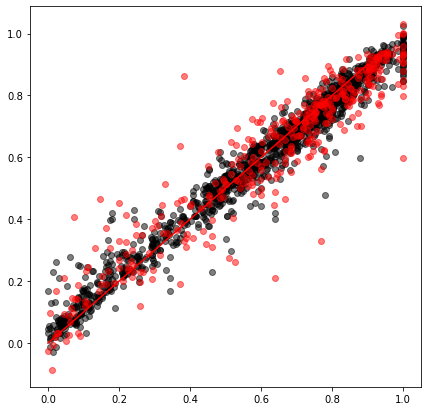

More than one metric available, picking one to plot.


<AxesSubplot:title={'center':'Metric during training'}, xlabel='Iterations', ylabel='huber'>

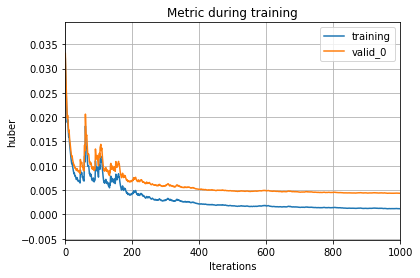

In [75]:
import timeit
start = timeit.default_timer()

params = {"objective":"reg:logistic", 'tree_method':'gpu_hist', 'booster': 'dart', 'one_drop':1}#,'colsample_bytree': 0.3,'learning_rate': 0.1, 
         # 'max_depth': 5, 'alpha': 10}#, 'process_type': 'update', 'updater': 'refresh', 'refresh_leaf': True}
        # reg:pseudohubererror, reg:squaredlogerror, reg:squarederror, reg:gamma, reg:logistic, reg:tweedie
err_list = []
err_list_test = []
res = {}
model = None

for i in range(100):
    x_train_half, x_test_dummy, y_train_half, y_test_dummy = train_test_split(x_train, y_train, test_size=0.5, random_state=i)
    
    for j in range(len(y_train_half)):
        if y_train_half[j]==np.amax(y_train):
            #print('1')
            #y_train_half[j] = np.absolute(np.random.normal(np.mean(y_train_half)*0.01, np.std(y_train_half)*0.01, 1))
            np.random.seed(6)
            y_train_half[j] = 1 - np.absolute(np.random.normal(0.01, 0.005, 1))
    #y_train_half_noise = y_train_half + np.absolute(np.random.normal(0.001, 0.005, len(y_train_half)))
    xgtrain = xgb.DMatrix(x_train_half, y_train_half, feature_names=x_train_half.columns)
    xgtest = xgb.DMatrix(x_test_dummy, y_test_dummy, feature_names=x_test_dummy.columns)
    
    model = xgb.train(params=params, dtrain=xgtrain, num_boost_round=10, xgb_model=model, evals_result=res)
    pred_train = model.predict(xgtrain)
    pred_test = model.predict(xgtest)
    train_err = mean_squared_error(y_true=y_train_half, y_pred=pred_train)
    test_err = mean_squared_error(y_true=y_test_dummy, y_pred=pred_test)
    print(i, test_err)
    err_list.append(train_err)
    err_list_test.append(test_err)

stop = timeit.default_timer()
print('Time: ', stop - start)

In [20]:
import timeit
start = timeit.default_timer()

err_list = []
err_list_test = []

for i in range(100):
    x_train_half, x_test_dummy, y_train_half, y_test_dummy = train_test_split(x_train, y_train, test_size=0.5, random_state=i)
    
    for j in range(len(y_train_half)):
        if y_train_half[j]==np.amax(y_train):
            #print('1')
            #y_train_half[j] = np.absolute(np.random.normal(np.mean(y_train_half)*0.01, np.std(y_train_half)*0.01, 1))
            np.random.seed(6)
            y_train_half[j] = 1 - np.absolute(np.random.normal(0.01, 0.005, 1))
    
    if i==0:
        model = XGBRegressor(objective = 'reg:logistic', tree_method='gpu_hist', n_estimators=5) #booster='dart', one_drop=1, colsample_bytree=0.5
        model.fit(x_train_half, y_train_half, verbose=3)
    
    else:
        model.fit(x_train_half, y_train_half, verbose=3, xgb_model=model.get_booster())

    pred_train = model.predict(x_train_half)
    pred_test = model.predict(x_test_dummy)
    print(mean_squared_error(y_true=y_test, y_pred=model.predict(x_test)))
    train_err = mean_squared_error(y_true=y_train_half, y_pred=pred_train)
    test_err = mean_squared_error(y_true=y_test_dummy, y_pred=pred_test)
    print(i, test_err)
    err_list.append(train_err)
    err_list_test.append(test_err)

stop = timeit.default_timer()
print('Time: ', stop - start)

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


0.0321565292442841
0 0.03666030788894682


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


0.02269057886151906
1 0.022370954269806315


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


0.018827603015020136
2 0.017529608911175686


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


0.016371186557393464
3 0.0124299723643873


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


0.014999195855004758
4 0.01025804941918394


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


0.014431071792892193
5 0.009863285339950038


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


0.014301723851295817
6 0.009832793391166852


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


0.01333899293504974
7 0.008484456459866452


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


0.01330542523419719
8 0.007413846824675303


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


0.01306428523183271
9 0.006806691635985869


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


0.01265744548101939
10 0.006660410565495951


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


0.012476436188663807
11 0.005854308049794234


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


0.012639825974267148
12 0.005878964552269485


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


0.01263398040647685
13 0.005582408632416219


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


0.012283064762027599
14 0.0050584335188778515


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


0.011941948368193107
15 0.005129798964924706


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


0.011582784486209228
16 0.004348773707931809


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


0.011790459757673108
17 0.004214551426775488


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


0.011782156882198642
18 0.004177358269598114


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


0.011889036957180814
19 0.004253170698896989


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


0.011584453902962904
20 0.003949378797639214


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


0.011100485538247449
21 0.0037568114661192587


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


0.011131491141850153
22 0.0034486043250942537


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


0.010965453713082511
23 0.003438332096995888


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


0.011013034590078595
24 0.003539727077071894


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


0.011025906618532418
25 0.002785958710842557


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


0.011083642375891507
26 0.0027898445917432556


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


0.010790692370681376
27 0.002730077420784134


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


0.01101355199421993
28 0.002794861370191034


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


0.011002203025448711
29 0.002797014555721023


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


0.011052499300871531
30 0.0027953150483120298


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


0.010865415512945766
31 0.0025695477056551326


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


0.010935460822439593
32 0.002712235530480825


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


0.01100786300213764
33 0.002601038591364937


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


0.011083427758036694
34 0.002348951946682842


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


0.011036215334075044
35 0.002275609673606897


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


0.011232625251807727
36 0.0022042450242414783


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


0.01141082578720835
37 0.0020834922208750927


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


0.011269991647181149
38 0.002223462037297857


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


0.011163379184808529
39 0.0019872173602949145


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


0.01105146947098615
40 0.0016501868434746238


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


0.010981872044267463
41 0.0019450672358355893


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


0.010903087984475998
42 0.0019496053979370846


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


0.010679638476890381
43 0.0019167340800617081


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


0.010825340481407283
44 0.0018396638284875826


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


0.010799775211015423
45 0.0019096650482899648


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


0.010889439674758685
46 0.0018300581499287333


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


0.011018756061489802
47 0.0015822727389248844


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


0.010914385820792155
48 0.0016073000776024692


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


0.010951320668165515
49 0.0016583140842805109


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


0.010845245137283181
50 0.0015264345876665139


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


0.011080632835916768
51 0.00158611354581493


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


0.010833775662434104
52 0.0014573326242901016


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


0.010785236875452882
53 0.001372697168028093


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


0.010801407617860458
54 0.00156661968752722


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


0.010909124885216524
55 0.0014497467768770293


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


0.010733514367309429
56 0.0014658596508953419


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


0.010754434905604437
57 0.0013820046387394071


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


0.010709732989417374
58 0.0013260281864469505


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


0.010618895333023858
59 0.0012910343974330905


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


0.010764253225665904
60 0.0014110948538959525


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


0.010758283275046632
61 0.0012976176086114373


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


0.010853061073538147
62 0.001182827019261167


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


0.010787212848723157
63 0.001342826055564916


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


0.010636556112589908
64 0.0011795659205906786


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


0.01064911638552083
65 0.0012230153800691576


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


0.010705194468559677
66 0.0012753848730092286


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


0.010774380055150804
67 0.0010876967827222676


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


0.01070045392484591
68 0.0011353342884021938


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


0.010723351545356282
69 0.001097403501873007


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


0.010713693571723814
70 0.0011983853077999738


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


0.010715455641350924
71 0.001148127269833479


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


0.010528789920343819
72 0.0012025795009550058


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


0.010514370803937145
73 0.0010857638591189305


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


0.010506425132358329
74 0.0009635506337741011


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


0.010555488887031506
75 0.001053976495549928


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


0.01047570543370926
76 0.0009681449770500702


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


0.010638332329006968
77 0.0009197881801536668


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


0.010600261515235175
78 0.0010917107258357477


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


0.010657005757653486
79 0.000969294170982115


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


0.010641995725653169
80 0.0009751386091119551


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


0.010534987047210148
81 0.0008855851340876205


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


0.010536805905395038
82 0.0009331056618636672


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


0.010699543979556312
83 0.0009660115946304529


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


0.010624832860093601
84 0.0009364749974624452


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


0.010579997219120247
85 0.0009161632152759246


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


0.010623688000069603
86 0.0008422658673114694


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


0.010657722489768904
87 0.0008288928262258415


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


0.010612015594690407
88 0.0008854095841772964


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


0.010632693632116715
89 0.0008274941686982925


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


0.010751342313892269
90 0.0008261971809897234


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


0.01085858312491356
91 0.000773562002737767


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


0.01071708211856512
92 0.000848133725563389


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


0.010722585626393527
93 0.0008221174973486555


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


0.010867698372945435
94 0.0008569464692359049


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


0.010725064794173032
95 0.0008159264331487131


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


0.010736260457197687
96 0.0008590480444124998


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


0.01076192992532464
97 0.00082989605185768


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


0.010765432573898665
98 0.0007952140714872123


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


0.010763002020019837
99 0.0007641099801314321
Time:  80.58541670000011


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


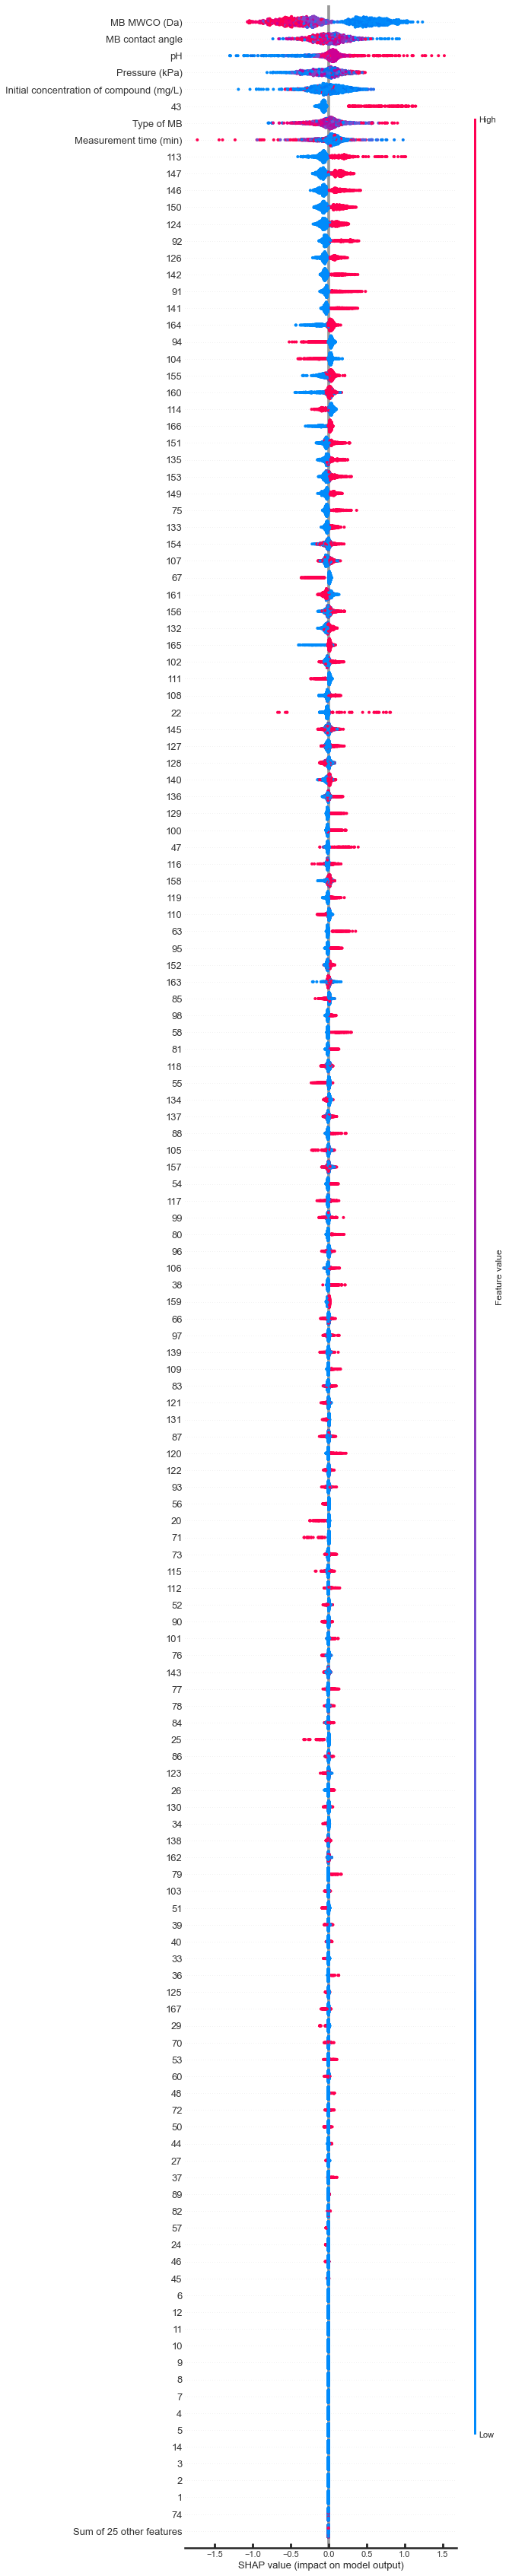

In [22]:
explainer = shap.TreeExplainer(model)
shap_values = explainer(x_train)
shap.plots.beeswarm(shap_values, max_display=150, order=shap_values.abs.mean(0), show=False)
#plt.savefig('sqrt_shap_path_3.pdf', format='pdf', dpi=1000, bbox_inches='tight')

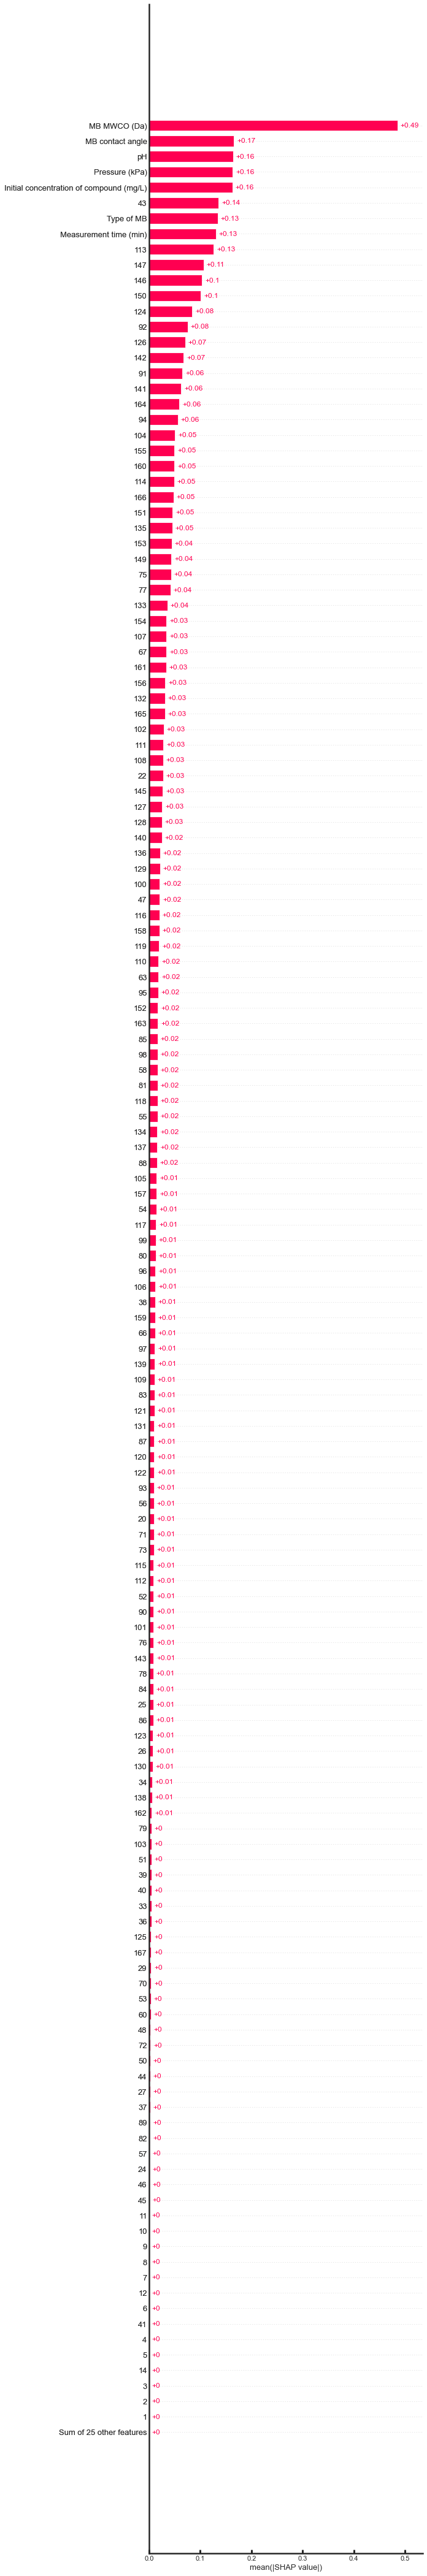

In [21]:
shap.plots.bar(shap_values, max_display=150)

In [118]:
shap_output = model.predict(xgtrain, pred_contribs=True)
shap_values = shap_output[:, :-1]
expected_value = shap_output[0, -1]
shap.summary_plot(shap_values)

In [60]:
err_list

[array([0.02527281]),
 array([0.01953101]),
 array([0.01621675]),
 array([0.01444325]),
 array([0.01310027]),
 array([0.01171205]),
 array([0.01026854]),
 array([0.00871715]),
 array([0.00846953]),
 array([0.00830227]),
 array([0.0070988]),
 array([0.00846027]),
 array([0.00681146]),
 array([0.00810187]),
 array([0.00675437]),
 array([0.00648379]),
 array([0.00693574]),
 array([0.00565544]),
 array([0.00567689]),
 array([0.00487182]),
 array([0.00523677]),
 array([0.00543703]),
 array([0.0050082]),
 array([0.00537941]),
 array([0.00462093]),
 array([0.00465358]),
 array([0.00535866]),
 array([0.00492184]),
 array([0.0045229]),
 array([0.00408383]),
 array([0.00396947]),
 array([0.00434908]),
 array([0.00405782]),
 array([0.00342307]),
 array([0.00345252]),
 array([0.00375045]),
 array([0.00373575]),
 array([0.00417106]),
 array([0.003404]),
 array([0.00339489]),
 array([0.00365232]),
 array([0.00317461]),
 array([0.00352655]),
 array([0.00313633]),
 array([0.00338344]),
 array([0.00350

In [61]:
err_list_test

[0.042705416355070684,
 0.02607499157339286,
 0.020814484239693967,
 0.018613644174175832,
 0.015032414557948907,
 0.014147816407768144,
 0.014150179292885935,
 0.013781282651877811,
 0.012910415508653945,
 0.01188688695073857,
 0.01250906401709291,
 0.009699746044867381,
 0.010687674115043516,
 0.008747902956422245,
 0.009233657732847237,
 0.00876449238117673,
 0.007862382000716421,
 0.008636070383064789,
 0.007912045812896845,
 0.00826778289610513,
 0.007507767587757283,
 0.006911683498320772,
 0.0070384531363425805,
 0.006459447823894163,
 0.006917203732877606,
 0.006866294866529096,
 0.0058256797731578635,
 0.005852224972423281,
 0.005894929313337799,
 0.005916247472167675,
 0.005943082623018982,
 0.00529133642625394,
 0.005460277389716891,
 0.005853595161663077,
 0.005878380167367452,
 0.00529323862459972,
 0.00517222751624653,
 0.004487158025329287,
 0.005183163923108736,
 0.005095918932575979,
 0.004815018394622102,
 0.005176362292340361,
 0.004652674246399287,
 0.00487321808908

In [21]:
pred_train = model.predict(x_train)
pred_test = model.predict(x_test)
print(mean_squared_error(y_true=y_train, y_pred=pred_train))
print(mean_squared_error(y_true=y_test, y_pred=pred_test))

0.001085678195760016
0.010172912154138777


0.0026162589523399354
0.011930629089777331


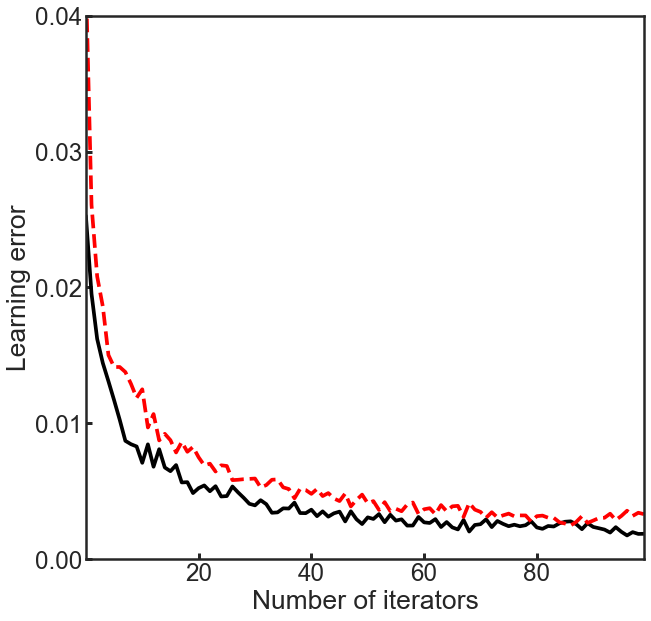

savefig() got unexpected keyword argument "bbox_i6nches" which is no longer supported as of 3.3 and will become an error in 3.6
meta NOT subset; don't know how to subset; dropped


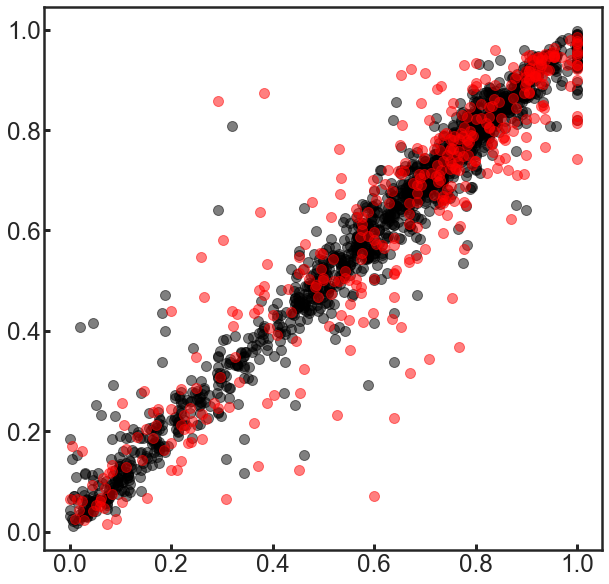

In [46]:
#y_test_noise = y_test + np.absolute(np.random.normal(np.mean(y_test)*0.01, np.std(y_test)*0.01, len(y_test)))
# pred_train = model.predict(xgb.DMatrix(x_train, y_train))
# pred_test = model.predict(xgb.DMatrix(x_test, y_test))
pred_train = model.predict(x_train)
pred_test = model.predict(x_test)
print(mean_squared_error(y_true=y_train, y_pred=pred_train))
print(mean_squared_error(y_true=y_test, y_pred=pred_test))

fig = plt.figure(figsize=(10,10))
plt.plot(err_list, 'k-')
plt.plot(err_list_test, 'r--')
plt.xlabel('Number of iterators')
plt.ylabel('Learning error')
plt.xlim(0.01,99)
plt.ylim(0,0.04)
#plt.xticks(np.arange(0,99,20))
plt.yticks(np.arange(0,0.0401,0.01))
plt.show()
fig.savefig('sqrt_fig_0_path_3.pdf', bbox_i6nches='tight', transparent=True)

plt.figure(figsize=(10,10))
plt.scatter(y_train, pred_train, c='k', alpha=0.5, s=100)
plt.scatter(y_test, pred_test, c='r', alpha=0.5, s=100)
#plt.plot(np.arange(0, 1.01, 0.1), np.arange(0, 1.01, 0.1), 'r-')
#plt.xlim(0,1)
#plt.ylim(0,1)
plt.show()

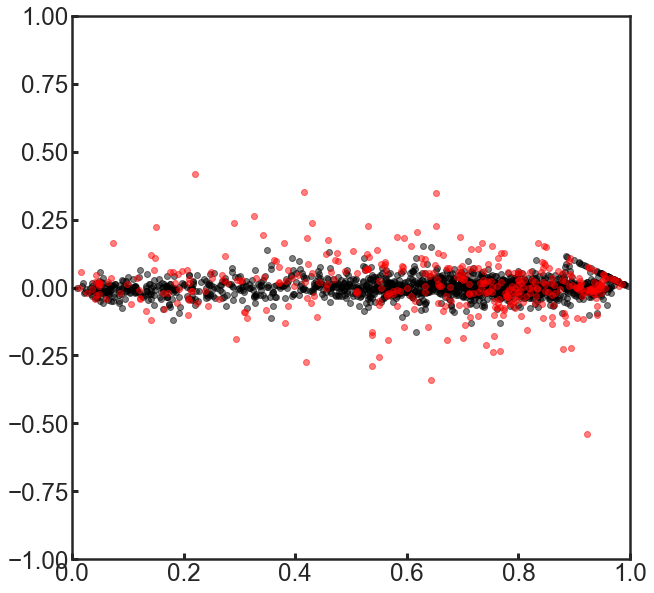

0.0010120640302584394
0.009279640857029002


In [91]:
plt.figure(figsize=(10,10))
plt.plot(pred_train, y_train-pred_train, 'ko', alpha=0.5)
plt.plot(pred_test, y_test-pred_test, 'ro', alpha=0.5)
plt.xlim(0,1)
plt.ylim(-1,1)
plt.show()

print(np.sum((y_train-pred_train)**2)/1524)
print(np.sum((y_test-pred_test)**2)/382)

In [47]:
tau, p_value = stats.kendalltau(y_test, pred_test)
print(stats.spearmanr(y_test, pred_test))
print(tau)
print(r2_score(y_test, pred_test))

SpearmanrResult(correlation=0.9075248026298885, pvalue=3.07466901749497e-145)
0.751241229294651
0.8376002516581201


In [48]:
pred_train_inverse = scaler_removal.inverse_transform(pred_train.reshape(1,-1))
pred_test_inverse = scaler_removal.inverse_transform(pred_test.reshape(1,-1))
y_train_inverse = scaler_removal.inverse_transform(np.reshape(y_train, (1,-1)))
y_test_inverse = scaler_removal.inverse_transform(np.reshape(y_test, (1,-1)))

In [40]:
# #log
# pred_train_real_scale = (1-np.exp(-pred_train_inverse))*100
# pred_test_real_scale = (1-np.exp(-pred_test_inverse))*100
# y_train_real_scale = (1-np.exp(-y_train_inverse))*100
# y_test_real_scale = (1-np.exp(-y_test_inverse))*100

In [49]:
#sqrt
pred_train_real_scale = (1-(-pred_train_inverse)**2)*100
pred_test_real_scale = (1-(-pred_test_inverse)**2)*100
y_train_real_scale = (1-(-y_train_inverse)**2)*100
y_test_real_scale = (1-(-y_test_inverse)**2)*100

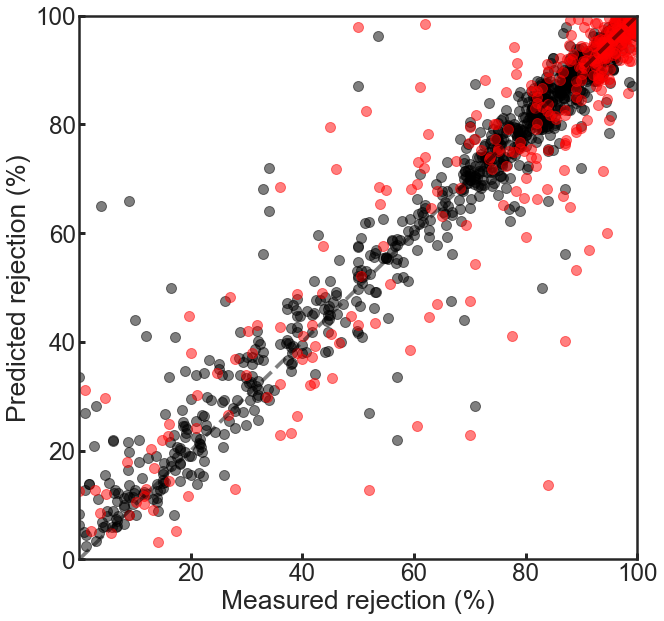

savefig() got unexpected keyword argument "bbox_i6nches" which is no longer supported as of 3.3 and will become an error in 3.6
meta NOT subset; don't know how to subset; dropped


In [50]:
fig = plt.figure(figsize=(10,10))
plt.plot(np.arange(0, 100.01, 0.1), np.arange(0, 100.01, 0.1), 'k--', alpha=0.5)
plt.scatter(y_train_real_scale, pred_train_real_scale, c='k', alpha=0.5, s=100)
plt.scatter(y_test_real_scale, pred_test_real_scale, c='r', alpha=0.5, s=100)
plt.xlim(0.01,100)
plt.ylim(0,100)
plt.xlabel('Measured rejection (%)')
plt.ylabel('Predicted rejection (%)')
plt.show()
fig.savefig("sqrt_fig_1_path_3.pdf", bbox_i6nches='tight', transparent=True)

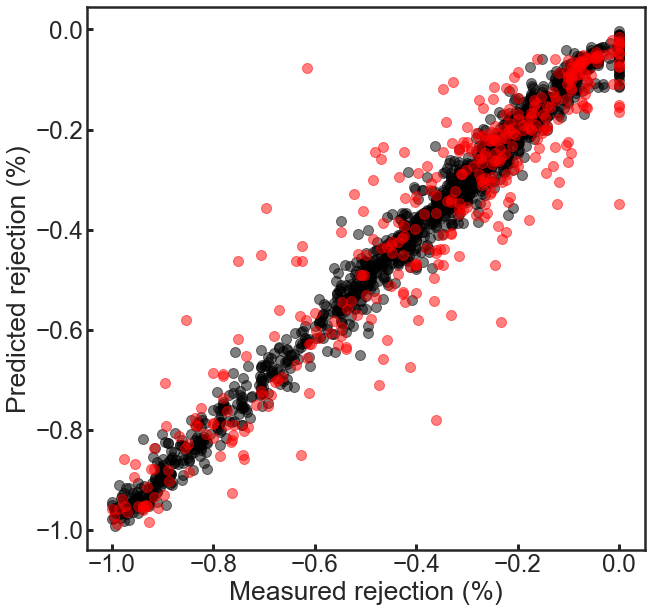

In [108]:
fig = plt.figure(figsize=(10,10))
plt.scatter(y_train_inverse, pred_train_inverse, c='k', alpha=0.5, s=100)
plt.scatter(y_test_inverse, pred_test_inverse, c='r', alpha=0.5, s=100)
#plt.plot(np.arange(0, 1.01, 0.1), np.arange(0, 1.01, 0.1), 'r-')
#plt.xlim(0,1)
#plt.ylim(0,1)
plt.xlabel('Measured rejection (%)')
plt.ylabel('Predicted rejection (%)')
plt.show()

In [51]:
#tau, p_value = stats.kendalltau(y_test_real_scale, pred_test_real_scale)
print(stats.spearmanr(y_train_real_scale[0], pred_train_real_scale[0]))
print(stats.spearmanr(y_test_real_scale[0], pred_test_real_scale[0]))
print(r2_score(y_train_real_scale[0], pred_train_real_scale[0]))
print(r2_score(y_test_real_scale[0], pred_test_real_scale[0]))
print(mean_squared_error(y_train_real_scale, pred_train_real_scale, squared=False))
print(mean_squared_error(y_test_real_scale, pred_test_real_scale, squared=False))

SpearmanrResult(correlation=0.9789347093971613, pvalue=0.0)
SpearmanrResult(correlation=0.9075248026298885, pvalue=3.07466901749497e-145)
0.9573213977126478
0.8374637629327765
2.6002030463749337
6.026294380234923


In [57]:
tau, p_value = stats.kendalltau(y_test_inverse, pred_test_inverse)
print(stats.spearmanr(y_test_inverse[0], pred_test_inverse[0]))
print(tau)
print(r2_score(y_test_inverse[0], pred_test_inverse[0]))
print(mean_squared_error(y_test_inverse[0], pred_test_inverse[0], squared=False))

SpearmanrResult(correlation=0.9167640429791172, pvalue=1.5718797451721199e-153)
0.7639477705359597
0.8642933525965555
0.09984804292351211


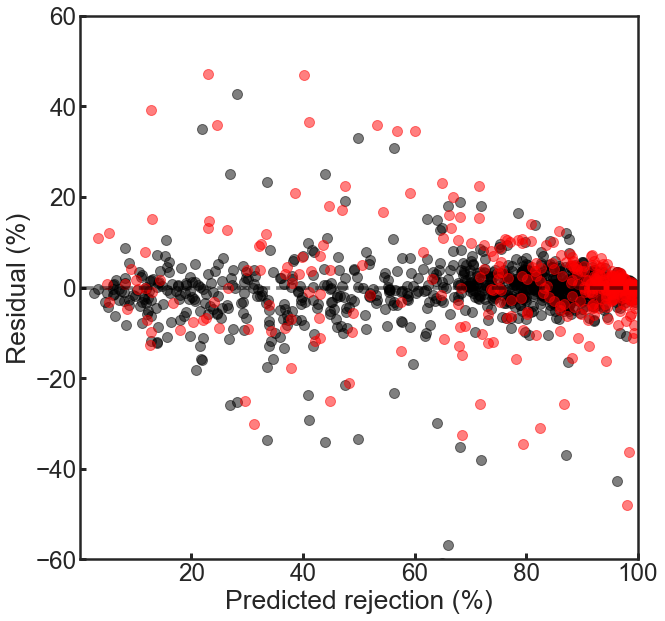

savefig() got unexpected keyword argument "bbox_i6nches" which is no longer supported as of 3.3 and will become an error in 3.6
meta NOT subset; don't know how to subset; dropped


In [52]:
fig = plt.figure(figsize=(10,10))
plt.plot(np.arange(0, 100.01, 0.1), np.zeros(1001), 'k--', alpha=0.5)
plt.scatter(pred_train_real_scale, y_train_real_scale-pred_train_real_scale, c='k', s=100, alpha=0.5)
plt.scatter(pred_test_real_scale, y_test_real_scale-pred_test_real_scale, c='r', s=100, alpha=0.5)
plt.xlabel('Predicted rejection (%)')
plt.ylabel('Residual (%)')
plt.xlim(0.01,100)
plt.ylim(-60,60)
plt.show()
fig.savefig("sqrt_residual_path_3.pdf", bbox_i6nches='tight', transparent=True)

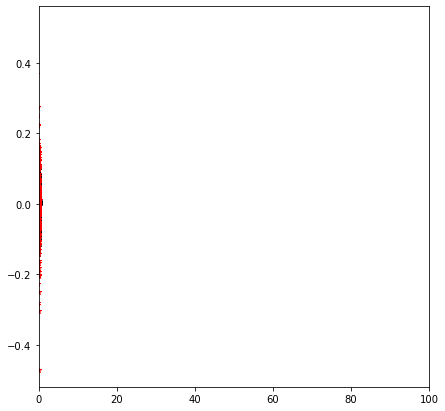

In [59]:
plt.figure(figsize=(7,7))
plt.plot(pred_train_inverse, y_train_inverse-pred_train_inverse, 'k^')
plt.plot(pred_test_inverse, y_test_inverse-pred_test_inverse, 'r*')
plt.xlim(0,100)
#plt.ylim(-1,1)
plt.show()

In [134]:
#x_train, x_test, y_train, y_test = train_test_split(x_data_scaled, y_data_scaled, test_size=0.2, random_state=3)

model_CA_1 = XGBRegressor(objective = 'reg:squarederror')
#model_CA_1 = XGBClassifier()
evaluation = [(x_train, y_train), (x_test, y_test)]
model_CA_1.fit(x_train, y_train, eval_set = evaluation, eval_metric = "rmse", early_stopping_rounds=10, verbose=3)
# model_CA_1.fit(x_train, y_train)
pred_train = model_CA_1.predict(x_train)#, training=False)
pred_test = model_CA_1.predict(x_test)#, training=False)

print(r2_score(y_train, pred_train))
print(r2_score(y_test, pred_test))

# print(accuracy_score(y_test, pred_CA_1))
# print(precision_score(y_test, pred_CA_1, average='macro'))
# print(recall_score(y_test, pred_CA_1, average='macro'))
# print(classification_report(y_test, pred_CA_1))


# # Cross validation
# n_repeats = 6
# for i in range(n_repeats):
#     cv = RepeatedKFold(n_splits = 6, n_repeats = 1, random_state = i) # n_splits = 3 or 6?
#     cv_predictions = cross_val_predict(model_CA_1, x_data_scaled, y_data_scaled, cv=cv, n_jobs=-1)
    
#     if i == 0:
#         old = cv_predictions
#     else:
#         old = (np.array(old) + np.array(cv_predictions))/2

# print("R2 is ", r2_score(y_data_scaled, old))
# # how to add plot_importance with a CV model?


plt.figure(figsize=(7,7))
plt.scatter(y_train, pred_train, c='k', alpha=0.5)
plt.scatter(y_test, pred_test, c='r', alpha=0.5)
#plt.plot(np.arange(0, 1.0, 0.1), np.arange(0, 1.0, 0.1), 'r-')
plt.show()

results = model_CA_1.evals_result()
plt.figure(figsize=(7,7))
plt.title('Learning curve_rmse')
plt.plot(results['validation_0']['rmse'], 'k--') #train
plt.plot(results['validation_1']['rmse'], 'r-') #test
plt.show()

NotFittedError: need to call fit or load_model beforehand

In [16]:
tau, p_value = stats.kendalltau(y_test, pred_test)
print(stats.spearmanr(y_test, pred_test))
print(tau)

SpearmanrResult(correlation=0.8598106953003057, pvalue=5.647392399783467e-113)
0.693094346217264


In [29]:
explainer = shap.Explainer(model_CA_1)
shap_values = explainer(x_train)
shap.plots.beeswarm(shap_values, max_display=20, order=shap_values.abs.mean(0))
#shap.plots.beeswarm(shap_values, max_display=20, order=shap_values.abs.max(0))
#shap.plots.bar(shap_values.abs.mean(0), max_display=20)
#shap.plots.beeswarm(shap_values.abs, color="shap_red", max_display=20)

NameError: name 'model_CA_1' is not defined

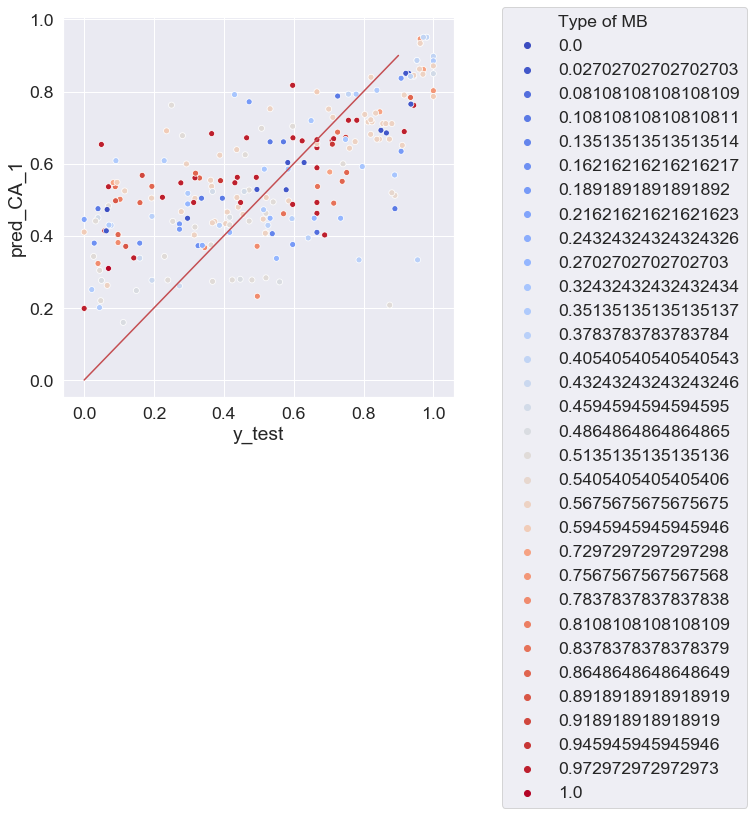

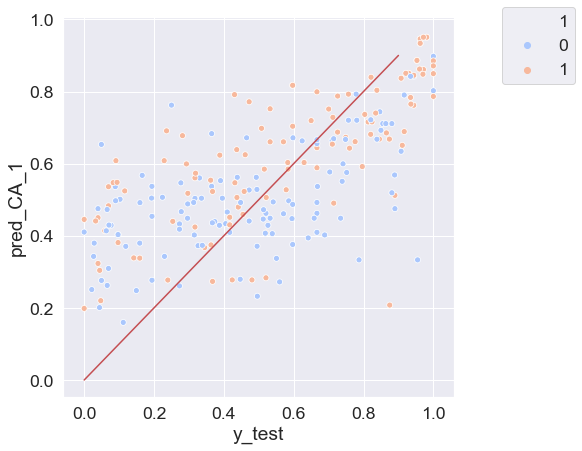

In [99]:
plt.figure(figsize=(7,7))
sns.scatterplot(df_test_temp['y_test'], df_test_temp['pred_CA_1'], hue=df_test_temp['Type of MB'], legend='full', palette='coolwarm')
plt.plot(np.arange(0, 1.0, 0.1), np.arange(0, 1.0, 0.1), 'r-')
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

plt.figure(figsize=(7,7))
sns.scatterplot(df_test_temp['y_test'], df_test_temp['pred_CA_1'], hue=df_test_temp['1'], legend='full', palette='coolwarm')
plt.plot(np.arange(0, 1.0, 0.1), np.arange(0, 1.0, 0.1), 'r-')
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

In [70]:
scaler_mem_type.inverse_transform(x_test.loc[:,'Type of MB'].values.reshape(-1,1))

C:\Users\leesa\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:273: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: y contains previously unseen labels: [19. 21. 27. 29. 31.]

In [27]:
scaler.inverse_transform(data_scaled)

scaler_mem_type = preprocessing.MinMaxScaler()
scaler_con_type = preprocessing.MinMaxScaler()
scaler_pH = preprocessing.MinMaxScaler()
scaler_MWCO = preprocessing.MinMaxScaler()
scaler_CA = preprocessing.MinMaxScaler()
scaler_zeta = preprocessing.MinMaxScaler()
scaler_kPa = preprocessing.MinMaxScaler()
scaler_removal = preprocessing.MinMaxScaler()

temp_0 = scaler_mem_type.inverse_transform(x_test.loc[:,'Type of MB'].values.reshape(-1,1))

NameError: name 'scaler' is not defined

In [ ]:
# XGBRegressor with Bayesian hyperparameter tuning
#x_train, x_test, y_train, y_test = train_test_split(x_data_scaled, y_data_scaled, test_size=0.2, random_state=3)

# # Original
# space={'max_depth': hp.choice('max_depth', np.arange(3, 50, 1)),
#         'gamma': hp.choice('gamma', np.arange(0, 20, 1)),
#         'reg_alpha' : hp.quniform('reg_alpha', 0.1, 10, 0.1),
#         'reg_lambda' : hp.quniform('reg_lambda', 0.1, 10, 0.1),
#         'colsample_bytree' : hp.quniform('colsample_bytree', 0.1, 1, 0.1),
#         'min_child_weight' : hp.choice('min_child_weight', np.arange(0, 10, 1)),
#         'n_estimators': hp.quniform('n_estimators', 200, 2000, 100),
#         'learning_rate': hp.quniform('learning_rate', 0, 0.3, 0.002),
#         'subsample': hp.quniform('subsample', 0.2, 1, 0.1),
#         'colsample_bylevel': hp.quniform('colsample_bylevel', 0.2, 1, 0.1),
#         'colsample_bynode': hp.quniform('colsample_bynode', 0.2, 1, 0.1),
#       }

# # Short 1
# space={'max_depth': hp.choice('max_depth', np.arange(3, 10, 1)),
#         'gamma': hp.choice('gamma', np.arange(0, 5, 1)),
#         'reg_alpha' : hp.quniform('reg_alpha', 0.1, 1, 0.1),
#         'reg_lambda' : hp.quniform('reg_lambda', 0.01, 1, 0.01),
#         'colsample_bytree' : hp.quniform('colsample_bytree', 0.1, 0.5, 0.1),
#         'min_child_weight' : hp.choice('min_child_weight', np.arange(0, 10, 1)),
#         'n_estimators': hp.quniform('n_estimators', 100, 1000, 100),
#         'learning_rate': hp.quniform('learning_rate', 0, 0.1, 0.002),
#         'subsample': hp.quniform('subsample', 0.2, 1, 0.1),
#         'colsample_bylevel': hp.quniform('colsample_bylevel', 0.2, 0.5, 0.1),
#         'colsample_bynode': hp.quniform('colsample_bynode', 0.2, 0.5, 0.1),
#       }

# Short 2
space={'max_depth': hp.choice('max_depth', np.arange(3, 20, 1)),
        'gamma': hp.choice('gamma', np.arange(0, 10, 1)),
        'reg_alpha' : hp.quniform('reg_alpha', 0.1, 5, 0.1),
        'reg_lambda' : hp.quniform('reg_lambda', 0.1, 5, 0.1),
        'colsample_bytree' : hp.quniform('colsample_bytree', 0.1, 1, 0.1),
        'min_child_weight' : hp.choice('min_child_weight', np.arange(0, 10, 1)),
        'n_estimators': hp.quniform('n_estimators', 100, 1500, 100),
        'learning_rate': hp.quniform('learning_rate', 0.002, 0.1, 0.002),
        'subsample': hp.quniform('subsample', 0.2, 1, 0.1),
        'colsample_bylevel': hp.quniform('colsample_bylevel', 0.2, 0.7, 0.1),
        'colsample_bynode': hp.quniform('colsample_bynode', 0.2, 0.7, 0.1),
      }


kf = KFold(n_splits=6, shuffle=True, random_state=3)

def objective(space, cv=kf, X=x_train, y=y_train):
    clf = XGBRegressor(objective = 'reg:squarederror', n_estimators = int(space['n_estimators']), max_depth = int(space['max_depth']), gamma = space['gamma'],
                       reg_alpha = int(space['reg_alpha']), reg_lambda = int(space['reg_lambda']), min_child_weight=space['min_child_weight'],
                       colsample_bytree=space['colsample_bytree'], learning_rate=space['learning_rate'], subsample=space['subsample'],
                       colsample_bylevel=space['colsample_bylevel'], colsample_bynode=space['colsample_bynode'], random_state = 3)
    
    score = -cross_val_score(clf, X, y, cv=cv, scoring="neg_mean_squared_error", n_jobs=-1).mean()
    return score

trials = Trials()
best_hyperparams = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=50, trials=trials, rstate=np.random.default_rng(3))
print(best_hyperparams)

 90%|██████████████████████████████████████████▎    | 45/50 [06:10<00:47,  9.42s/trial, best loss: 0.01680011525856317]

In [21]:
space={'objective': 'reg:logistic', 'tree_method':'gpu_hist', 'booster':'dart', 'one_drop':1,
        'max_depth': hp.choice('max_depth', np.arange(3, 20, 1)),
        'gamma': hp.choice('gamma', np.arange(0, 10, 1)),
        'reg_alpha' : hp.quniform('reg_alpha', 0.1, 5, 0.1),
        'reg_lambda' : hp.quniform('reg_lambda', 0.1, 5, 0.1),
        'colsample_bytree' : hp.quniform('colsample_bytree', 0.1, 1, 0.1),
        'min_child_weight' : hp.choice('min_child_weight', np.arange(0, 10, 1)),
        'learning_rate': hp.quniform('learning_rate', 0.002, 0.1, 0.002),
        'subsample': hp.quniform('subsample', 0.2, 1, 0.1),
        'colsample_bylevel': hp.quniform('colsample_bylevel', 0.2, 0.7, 0.1),
        'colsample_bynode': hp.quniform('colsample_bynode', 0.2, 0.7, 0.1),
      }
# 'n_estimators': hp.quniform('n_estimators', 100, 1500, 100),

def objective(space):
    model = None
    for i in range(100):
        x_train_half, x_test_dummy, y_train_half, y_test_dummy = train_test_split(x_train, y_train, test_size=0.5, random_state=i)

        for j in range(len(y_train_half)):
            if y_train_half[j]==np.amax(y_train):
                y_train_half[j] = 1 - np.absolute(np.random.normal(0.01, 0.005, 1))
        
        xgtrain = xgb.DMatrix(x_train_half, y_train_half)
        xgtest = xgb.DMatrix(x_test_dummy, y_test_dummy)

        model = xgb.train(params=space, dtrain=xgtrain, num_boost_round=10, xgb_model=model)
        pred_train = model.predict(xgtrain)
        pred_test = model.predict(xgtest)
        train_err = mean_squared_error(y_true=y_test_dummy, y_pred=pred_test)
    
    pred_test = model.predict(xgb.DMatrix(x_test, y_test))
    err = mean_squared_error(y_true=y_test, y_pred=pred_test)

    print ("SCORE:", err)
    return {'loss': err, 'status': STATUS_OK }

trials = Trials()

best_hyperparams = fmin(fn = objective, space = space, algo = tpe.suggest, max_evals = 30, trials = trials, rstate=np.random.default_rng(3))

  0%|                                                                           | 0/30 [00:00<?, ?trial/s, best loss=?]

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested s

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested s

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested s

SCORE:                                                                                                                 
0.048106177979511604                                                                                                   
  3%|█▍                                          | 1/30 [14:42<7:06:33, 882.54s/trial, best loss: 0.048106177979511604]

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested s

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested s

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested s

SCORE:                                                                                                                 
0.06178174615971347                                                                                                    
  7%|██▉                                         | 2/30 [28:27<6:36:05, 848.76s/trial, best loss: 0.048106177979511604]

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested s

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested s

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested s

SCORE:                                                                                                                 
0.07295967299812416                                                                                                    
 10%|████▍                                       | 3/30 [42:14<6:17:23, 838.65s/trial, best loss: 0.048106177979511604]

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested s

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested s

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested s

SCORE:                                                                                                                 
0.048277786664125966                                                                                                   
 13%|█████▊                                      | 4/30 [56:11<6:03:13, 838.19s/trial, best loss: 0.048106177979511604]

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested s

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested s

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested s

SCORE:                                                                                                                 
0.05887212320553084                                                                                                    
 17%|███████                                   | 5/30 [1:10:00<5:47:52, 834.90s/trial, best loss: 0.048106177979511604]

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested s

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested s

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested s

SCORE:                                                                                                                 
0.04416266238111029                                                                                                    
 20%|████████▌                                  | 6/30 [1:23:53<5:33:37, 834.06s/trial, best loss: 0.04416266238111029]

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested s

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested s

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested s

SCORE:                                                                                                                 
0.05354443195558778                                                                                                    
 23%|██████████                                 | 7/30 [1:37:37<5:18:28, 830.80s/trial, best loss: 0.04416266238111029]

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested s

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested s

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested s

SCORE:                                                                                                                 
0.0732040581859479                                                                                                     
 27%|███████████▍                               | 8/30 [1:51:23<5:04:04, 829.27s/trial, best loss: 0.04416266238111029]

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested s

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested s

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested s

SCORE:                                                                                                                 
0.061873907585329825                                                                                                   
 30%|████████████▉                              | 9/30 [2:05:06<4:49:34, 827.34s/trial, best loss: 0.04416266238111029]

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested s

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested s

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested s

SCORE:                                                                                                                 
0.04793851381089492                                                                                                    
 33%|██████████████                            | 10/30 [2:18:57<4:36:08, 828.42s/trial, best loss: 0.04416266238111029]

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested s

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested s

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested s

SCORE:                                                                                                                 
0.05685454612692305                                                                                                    
 37%|███████████████▍                          | 11/30 [2:32:43<4:22:08, 827.79s/trial, best loss: 0.04416266238111029]

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested s

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested s

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested s

SCORE:                                                                                                                 
0.05669817264348979                                                                                                    
 40%|████████████████▊                         | 12/30 [2:46:34<4:08:36, 828.70s/trial, best loss: 0.04416266238111029]

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested s

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested s

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested s

SCORE:                                                                                                                 
0.06872040119472139                                                                                                    
 43%|██████████████████▏                       | 13/30 [3:00:24<3:54:55, 829.15s/trial, best loss: 0.04416266238111029]

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested s

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested s

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested s

SCORE:                                                                                                                 
0.05823116375974386                                                                                                    
 47%|███████████████████▌                      | 14/30 [3:14:11<3:40:56, 828.50s/trial, best loss: 0.04416266238111029]

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested s

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested s

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested s

SCORE:                                                                                                                 
0.05281185445910625                                                                                                    
 50%|█████████████████████                     | 15/30 [3:27:59<3:27:02, 828.18s/trial, best loss: 0.04416266238111029]

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested s

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested s

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested s

SCORE:                                                                                                                 
0.037894210004381694                                                                                                   
 53%|█████████████████████▊                   | 16/30 [3:41:55<3:13:49, 830.65s/trial, best loss: 0.037894210004381694]

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested s

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested s

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested s

SCORE:                                                                                                                 
0.07084173932539994                                                                                                    
 57%|███████████████████████▏                 | 17/30 [3:55:48<3:00:07, 831.36s/trial, best loss: 0.037894210004381694]

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested s

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested s

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested s

SCORE:                                                                                                                 
0.03938753093874299                                                                                                    
 60%|████████████████████████▌                | 18/30 [4:09:44<2:46:32, 832.68s/trial, best loss: 0.037894210004381694]

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested s

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested s

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested s

SCORE:                                                                                                                 
0.06562793209508189                                                                                                    
 63%|█████████████████████████▉               | 19/30 [4:23:35<2:32:33, 832.16s/trial, best loss: 0.037894210004381694]

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested s

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested s

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested s

SCORE:                                                                                                                 
0.06000514105745536                                                                                                    
 67%|███████████████████████████▎             | 20/30 [4:37:24<2:18:34, 831.47s/trial, best loss: 0.037894210004381694]

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested s

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested s

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested s

SCORE:                                                                                                                 
0.05034110094630941                                                                                                    
 70%|████████████████████████████▋            | 21/30 [4:51:14<2:04:37, 830.79s/trial, best loss: 0.037894210004381694]

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested s

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested s

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested s

SCORE:                                                                                                                 
0.056724598378889865                                                                                                   
 73%|██████████████████████████████           | 22/30 [5:05:07<1:50:51, 831.44s/trial, best loss: 0.037894210004381694]

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested s

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested s

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested s

SCORE:                                                                                                                 
0.0489004405007736                                                                                                     
 77%|███████████████████████████████▍         | 23/30 [5:19:04<1:37:11, 833.14s/trial, best loss: 0.037894210004381694]

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested s

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested s

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested s

SCORE:                                                                                                                 
0.03281045454340749                                                                                                    
 80%|█████████████████████████████████▌        | 24/30 [5:33:24<1:24:07, 841.21s/trial, best loss: 0.03281045454340749]

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested s

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested s

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested s

SCORE:                                                                                                                 
0.024162000625478432                                                                                                   
 83%|██████████████████████████████████▏      | 25/30 [5:48:05<1:11:06, 853.22s/trial, best loss: 0.024162000625478432]

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested s

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested s

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested s

SCORE:                                                                                                                 
0.029417138163817948                                                                                                   
 87%|█████████████████████████████████████▎     | 26/30 [6:02:46<57:26, 861.68s/trial, best loss: 0.024162000625478432]

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested s

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested s

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested s

SCORE:                                                                                                                 
0.05321610652482941                                                                                                    
 90%|██████████████████████████████████████▋    | 27/30 [6:16:56<42:54, 858.09s/trial, best loss: 0.024162000625478432]

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested s

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested s

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested s

SCORE:                                                                                                                 
0.050193836786046594                                                                                                   
 93%|████████████████████████████████████████▏  | 28/30 [6:30:49<28:21, 850.62s/trial, best loss: 0.024162000625478432]

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested s

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested s

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested s

SCORE:                                                                                                                 
0.031237552324306028                                                                                                   
 97%|█████████████████████████████████████████▌ | 29/30 [6:45:51<14:26, 866.02s/trial, best loss: 0.024162000625478432]

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested s

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested s

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

Creating an ndarray from ragged nested s

SCORE:                                                                                                                 
0.048569339428797056                                                                                                   
100%|███████████████████████████████████████████| 30/30 [7:00:40<00:00, 841.36s/trial, best loss: 0.024162000625478432]


In [22]:
best_hyperparams

{'colsample_bylevel': 0.6000000000000001,
 'colsample_bynode': 0.5,
 'colsample_bytree': 0.6000000000000001,
 'gamma': 0,
 'learning_rate': 0.024,
 'max_depth': 7,
 'min_child_weight': 2,
 'reg_alpha': 3.4000000000000004,
 'reg_lambda': 4.9,
 'subsample': 1.0}

In [43]:
data = list(best_hyperparams.items())
np.savetxt('best_hyperparams_path_1024_1_fin_b2.txt', data, fmt='%s')

In [15]:
data = list(best_hyperparams.items())
np.savetxt('best_hyperparams_path_2048_2_short.txt', data, fmt='%s')

In [46]:
data = list(best_hyperparams.items())
np.savetxt('best_hyperparams_path_2048_2_new.txt', data, fmt='%s')

In [36]:
data = list(best_hyperparams.items())
np.savetxt('best_hyperparams_path_2048_7_short.txt', data, fmt='%s')

In [35]:
data = list(best_hyperparams.items())
np.savetxt('best_hyperparams_path_2048_7_mem_class.txt', data, fmt='%s')

In [18]:
data = list(best_hyperparams.items())
np.savetxt('best_hyperparams_path_2048_7_new.txt', data, fmt='%s')

In [18]:
data = list(best_hyperparams.items())
np.savetxt('best_hyperparams_path_8192_2_new.txt', data, fmt='%s')

In [ ]:
data = list(best_hyperparams.items())
np.savetxt('best_hyperparams_path_8192_4_new.txt', data, fmt='%s')

In [18]:
data = list(best_hyperparams.items())
np.savetxt('best_hyperparams_path_32768_3_fin_b2.txt', data, fmt='%s')

In [47]:
data = list(best_hyperparams.items())
np.savetxt('best_hyperparams_rdkit_2048.txt', data, fmt='%s')

In [79]:
data = list(best_hyperparams.items())
np.savetxt('best_hyperparams_rdkit_2048_short_2.txt', data, fmt='%s')

In [14]:
data = list(best_hyperparams.items())
np.savetxt('best_hyperparams_morgan_2048_6.txt', data, fmt='%s')

In [58]:
data = list(best_hyperparams.items())
np.savetxt('best_hyperparams_morgan_2048_6_short.txt', data, fmt='%s')

In [22]:
data = list(best_hyperparams.items())
np.savetxt('best_hyperparams_morgan_2048_6_new.txt', data, fmt='%s')

In [15]:
data = list(best_hyperparams.items())
np.savetxt('best_hyperparams_morgan_2048_7_short.txt', data, fmt='%s')

In [15]:
data = list(best_hyperparams.items())
np.savetxt('best_hyperparams_morgan_2048_2_short.txt', data, fmt='%s')

In [18]:
data = list(best_hyperparams.items())
np.savetxt('best_hyperparams_morgan_2048_1_new.txt', data, fmt='%s')

In [65]:
data = list(best_hyperparams.items())
np.savetxt('best_hyperparams_morgan_2048_2_new.txt', data, fmt='%s')

In [68]:
data = list(best_hyperparams.items())
np.savetxt('best_hyperparams_morgan_4096_1_fin.txt', data, fmt='%s')

In [91]:
data = list(best_hyperparams.items())
np.savetxt('best_hyperparams_morgan_16384_3_fin_b2.txt', data, fmt='%s')

In [15]:
data = list(best_hyperparams.items())
np.savetxt('best_hyperparams_pubchem_881.txt', data, fmt='%s')

In [14]:
data = list(best_hyperparams.items())
np.savetxt('best_hyperparams_pubchem_881_short.txt', data, fmt='%s')

In [154]:
data = list(best_hyperparams.items())
np.savetxt('best_hyperparams_pubchem_881_fin_b2.txt', data, fmt='%s')

In [43]:
data = list(best_hyperparams.items())
np.savetxt('best_hyperparams_maccs_166.txt', data, fmt='%s')

In [21]:
data = list(best_hyperparams.items())
np.savetxt('best_hyperparams_maccs_166_short.txt', data, fmt='%s')

In [131]:
data = list(best_hyperparams.items())
np.savetxt('best_hyperparams_maccs_166_fin_b2.txt', data, fmt='%s')

In [26]:
data = list(best_hyperparams.items())
np.savetxt('best_hyperparams_morgan_4096_1_sqrt.txt', data, fmt='%s')

In [15]:
best_hyperparams = np.loadtxt("best_hyperparams_pubchem_881_short.txt", dtype=str)
best_hyperparams = dict(best_hyperparams)
for k, v in best_hyperparams.items():
    best_hyperparams[k] = float(v)

In [210]:
# XGBRegressor with Bayesian best parameters
model_B_best = XGBRegressor(objective = 'reg:squarederror', n_estimators = int(best_hyperparams['n_estimators']), max_depth = int(best_hyperparams['max_depth']), 
                             gamma = best_hyperparams['gamma'], reg_alpha = int(best_hyperparams['reg_alpha']), reg_lambda = int(best_hyperparams['reg_lambda']), min_child_weight=best_hyperparams['min_child_weight'],
                             colsample_bytree=best_hyperparams['colsample_bytree'], learning_rate=best_hyperparams['learning_rate'], 
                             subsample=best_hyperparams['subsample'], colsample_bylevel=best_hyperparams['colsample_bylevel'], 
                             colsample_bynode=best_hyperparams['colsample_bynode'], random_state = 3, eval_metric = "rmse")

evaluation = [(x_train, y_train), (x_test, y_test)]
model_B_best.fit(x_train, y_train, eval_set = evaluation, verbose=3)#, early_stopping_rounds=10)
y_pred_train_best = model_B_best.predict(x_train)
y_pred_test_best = model_B_best.predict(x_test)
print(r2_score(y_train, y_pred_train_best))
print(r2_score(y_test, y_pred_test_best))
results = model_B_best.evals_result()


# # Cross validation
# model_B_best_cv = XGBRegressor(objective = 'reg:squarederror', n_estimators = int(best_hyperparams['n_estimators']), max_depth = int(best_hyperparams['max_depth']), 
#                              gamma = best_hyperparams['gamma'], reg_alpha = int(best_hyperparams['reg_alpha']), reg_lambda = int(best_hyperparams['reg_lambda']), min_child_weight=best_hyperparams['min_child_weight'],
#                              colsample_bytree=best_hyperparams['colsample_bytree'], learning_rate=best_hyperparams['learning_rate'], 
#                              subsample=best_hyperparams['subsample'], colsample_bylevel=best_hyperparams['colsample_bylevel'], 
#                              colsample_bynode=best_hyperparams['colsample_bynode'], random_state = 3)

# n_repeats = 6
# for i in range(n_repeats):
#     cv = RepeatedKFold(n_splits = 6, n_repeats = 1, random_state = i) # n_splits = 3 or 6?
#     cv_predictions = cross_val_predict(model_B_best_cv, x_data_scaled, y_data_scaled, cv=cv, n_jobs=-1)
    
#     if i == 0:
#         old = cv_predictions
#     else:
#         old = (np.array(old) + np.array(cv_predictions))/2

# print("R2 is ", r2_score(y_data_scaled, old))
# # how to add plot_importance with a CV model?

[0]	validation_0-rmse:0.28698	validation_1-rmse:0.28733
[3]	validation_0-rmse:0.25621	validation_1-rmse:0.25945
[6]	validation_0-rmse:0.23362	validation_1-rmse:0.23857
[9]	validation_0-rmse:0.21524	validation_1-rmse:0.22189
[12]	validation_0-rmse:0.20322	validation_1-rmse:0.21204
[15]	validation_0-rmse:0.19157	validation_1-rmse:0.20101
[18]	validation_0-rmse:0.18355	validation_1-rmse:0.19422
[21]	validation_0-rmse:0.17521	validation_1-rmse:0.18616
[24]	validation_0-rmse:0.16944	validation_1-rmse:0.18176
[27]	validation_0-rmse:0.16473	validation_1-rmse:0.17807
[30]	validation_0-rmse:0.16007	validation_1-rmse:0.17399
[33]	validation_0-rmse:0.15608	validation_1-rmse:0.17070
[36]	validation_0-rmse:0.15291	validation_1-rmse:0.16813
[39]	validation_0-rmse:0.14987	validation_1-rmse:0.16561
[42]	validation_0-rmse:0.14706	validation_1-rmse:0.16331
[45]	validation_0-rmse:0.14500	validation_1-rmse:0.16152
[48]	validation_0-rmse:0.14170	validation_1-rmse:0.15842
[51]	validation_0-rmse:0.13929	vali

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


0 0.07909072582215554


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


1 0.06942003252158459


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


2 0.06197004259482292


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


3 0.05584927047812061


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


4 0.05364238488207519


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


5 0.05196716817483707


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


6 0.04909461548439746


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


7 0.04656342174867482


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


8 0.04416402077232772


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


9 0.0408126102864982


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


10 0.04068193673344507


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


11 0.03912917538543679


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


12 0.041342234870180454


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


13 0.03824508014412136


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


14 0.03570654387537558


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


15 0.03693861832301049


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


16 0.03614018292427658


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


17 0.03511179270734234


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


18 0.03502446249159632


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


19 0.03314135543603559


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


20 0.03468345355210196


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


21 0.03277797192415655


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


22 0.03292485657027293


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


23 0.03122325186214785


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


24 0.03133046258823156


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


25 0.0321741830147403


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


26 0.0304784363611974


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


27 0.03110680667644285


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


28 0.029335456950091467


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


29 0.029241074569905816


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


30 0.030419826560207048


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


31 0.0289584318259517


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


32 0.029583834462786965


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


33 0.026673984772819542


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


34 0.02787036917863119


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


35 0.02916900672433983


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


36 0.02881765445347561


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


37 0.02887889951291818


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


38 0.027231164485973354


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


39 0.029863415944145193


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


40 0.026220359677092697


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


41 0.02827276892571639


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


42 0.02626559426944456


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


43 0.026752581212957278


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


44 0.029747697322867667


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


45 0.027267267178639386


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


46 0.02734327110698516


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


47 0.02396235533266683


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


48 0.0265986260503544


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


49 0.027233813514639396


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


50 0.025738371051851113


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


51 0.024549239872023815


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


52 0.026367579493002155


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


53 0.026416635004977325


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


54 0.02562090973137543


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


55 0.026497960174232005


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


56 0.026062354308846312


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


57 0.026235267880405755


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


58 0.024013411819092615


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


59 0.023972916930745828


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


60 0.02463368723490087


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


61 0.02618814042637427


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


62 0.024759004031920617


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


63 0.024177108787615635


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


64 0.023708245215794566


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


65 0.025476700544212482


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


66 0.024998165959791964


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


67 0.022630715571054148


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


68 0.023203819286006618


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


69 0.02587523012586036


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


70 0.023698113086757705


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


71 0.024660723522509177


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


72 0.02354452761199006


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


73 0.02395301330032377


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


74 0.024277601600808583


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


75 0.02301429106755219


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


76 0.02519037380191064


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


77 0.023146764218877992


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


78 0.022592496228910353


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


79 0.022108782329191765


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


80 0.02377080660777819


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


81 0.023081477436021684


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


82 0.024229366103353803


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


83 0.02235302003286453


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


84 0.02345889952396978


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


85 0.023427287605369246


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


86 0.022702390034202703


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


87 0.022695289701774028


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


88 0.023135673265520372


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


89 0.023477918350995896


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


90 0.022825040730039797


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


91 0.022980110473438908


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


92 0.023066157572348037


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


93 0.023911572565836817


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


94 0.021363786527115344


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


95 0.02217292967207237


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


96 0.022196748075556796


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


97 0.023098833993425476


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


98 0.022053383324729548


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


99 0.021506508671965775
0.024054683872899236


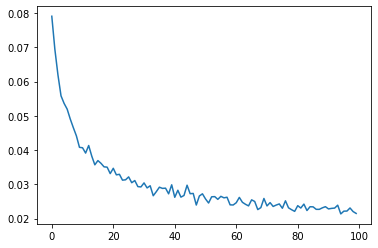

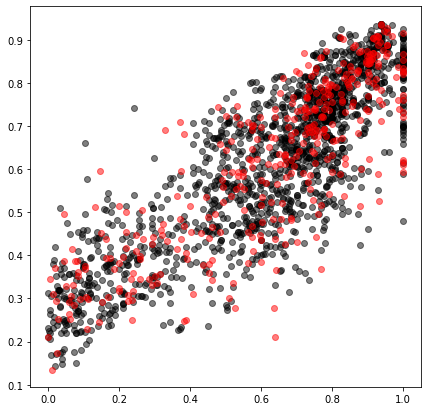

In [23]:
params = {"objective":"reg:logistic", 'tree_method':'gpu_hist',
         'max_depth' : int(best_hyperparams['max_depth']), 
         'gamma' : best_hyperparams['gamma'],
         'reg_alpha' : int(best_hyperparams['reg_alpha']), 
         'reg_lambda' : int(best_hyperparams['reg_lambda']), 
          'min_child_weight' : best_hyperparams['min_child_weight'],
          'colsample_bytree' : best_hyperparams['colsample_bytree'], 
          'learning_rate' : best_hyperparams['learning_rate'], 
          'subsample' : best_hyperparams['subsample'], 
          'colsample_bylevel' : best_hyperparams['colsample_bylevel'], 
          'colsample_bynode' : best_hyperparams['colsample_bynode'], 
          'random_state' : 3}

err_list = []
res = {}
model = None

for i in range(100):
    x_train_half, x_test_dummy, y_train_half, y_test_dummy = train_test_split(x_train, y_train, test_size=0.5, random_state=i)
    
    for j in range(len(y_train_half)):
        if y_train_half[j]==np.amax(y_train):
            #print('1')
            #y_train_half[j] = np.absolute(np.random.normal(np.mean(y_train_half)*0.01, np.std(y_train_half)*0.01, 1))
            y_train_half[j] = 1 - np.absolute(np.random.normal(0.01, 0.005, 1))
    #y_train_half_noise = y_train_half + np.absolute(np.random.normal(0.001, 0.005, len(y_train_half)))
    xgtrain = xgb.DMatrix(x_train_half, y_train_half)
    xgtest = xgb.DMatrix(x_test_dummy, y_test_dummy)

    model = xgb.train(params=params, dtrain=xgtrain, num_boost_round=10, xgb_model=model, evals_result=res)
    pred_train = model.predict(xgtrain)
    pred_test = model.predict(xgtest)
    train_err = mean_squared_error(y_true=y_test_dummy, y_pred=pred_test)
    print(i, mean_squared_error(y_true=y_test_dummy, y_pred=pred_test))
    err_list.append(train_err)

plt.plot(err_list)

#y_test_noise = y_test + np.absolute(np.random.normal(np.mean(y_test)*0.01, np.std(y_test)*0.01, len(y_test)))
pred_train = model.predict(xgb.DMatrix(x_train, y_train))
pred_test = model.predict(xgb.DMatrix(x_test, y_test))
print(mean_squared_error(y_true=y_test, y_pred=pred_test))
plt.figure(figsize=(7,7))
plt.scatter(y_train, pred_train, c='k', alpha=0.5)
plt.scatter(y_test, pred_test, c='r', alpha=0.5)
#plt.plot(np.arange(0, 1.01, 0.1), np.arange(0, 1.01, 0.1), 'r-')
#plt.xlim(0,1)
#plt.ylim(0,1)
plt.show()

In [24]:
tau, p_value = stats.kendalltau(y_test, pred_test)
print(stats.spearmanr(y_test, pred_test))
print(tau)
print(r2_score(y_test, pred_test))

SpearmanrResult(correlation=0.8232717523657794, pvalue=1.7602797776936417e-95)
0.6331124307594824
0.6725675923703349


(array([ 2.,  1.,  3.,  1.,  5.,  1.,  1.,  0.,  1.,  3.,  0.,  7.,  2.,
         3.,  3.,  1.,  3.,  2.,  1.,  1.,  3.,  3.,  5.,  3.,  1.,  1.,
         2.,  2.,  2.,  1.,  4.,  4.,  1.,  1.,  2.,  2.,  1.,  0.,  3.,
         2.,  2.,  2.,  0.,  5.,  2.,  2.,  1.,  3.,  2.,  2.,  3.,  4.,
         2.,  2.,  5.,  5.,  4.,  1.,  5.,  5.,  6.,  3.,  3.,  3.,  9.,
         2.,  4.,  5.,  6.,  5.,  3.,  7., 10.,  3.,  5., 13.,  8., 11.,
         7., 12.,  4.,  3.,  7.,  5.,  5.,  4.,  5.,  8., 11.,  6.,  3.,
        11.,  4.,  8.,  5.,  8., 12.,  3.,  0.,  4.]),
 array([0.00813247, 0.0179085 , 0.02768452, 0.03746055, 0.04723658,
        0.05701261, 0.06678864, 0.07656467, 0.0863407 , 0.09611673,
        0.10589276, 0.11566879, 0.12544481, 0.13522084, 0.14499687,
        0.15477291, 0.16454893, 0.17432496, 0.18410099, 0.19387701,
        0.20365304, 0.21342908, 0.2232051 , 0.23298113, 0.24275716,
        0.2525332 , 0.26230922, 0.27208525, 0.28186128, 0.2916373 ,
        0.30141333, 0.3111

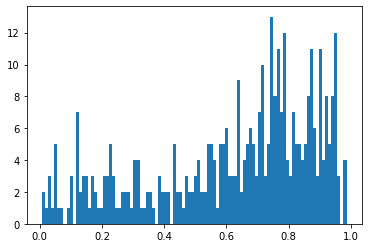

In [29]:
plt.hist(pred_test, bins = 100)

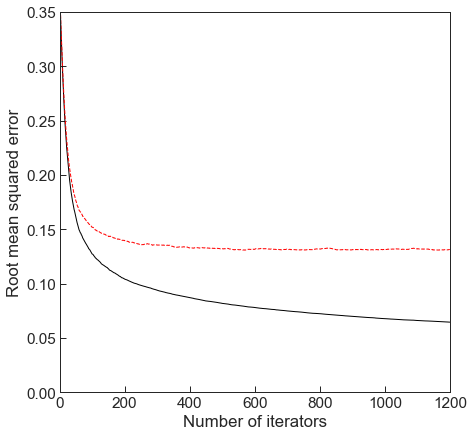

savefig() got unexpected keyword argument "bbox_i6nches" which is no longer supported as of 3.3 and will become an error in 3.6
meta NOT subset; don't know how to subset; dropped


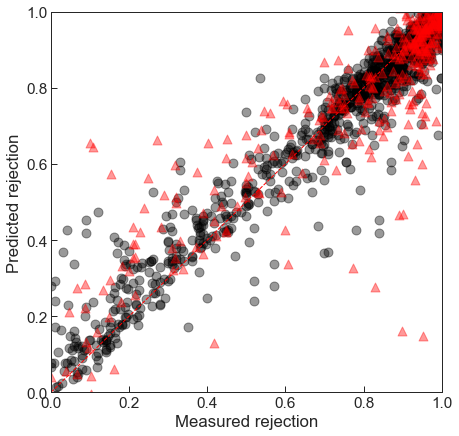

meta NOT subset; don't know how to subset; dropped


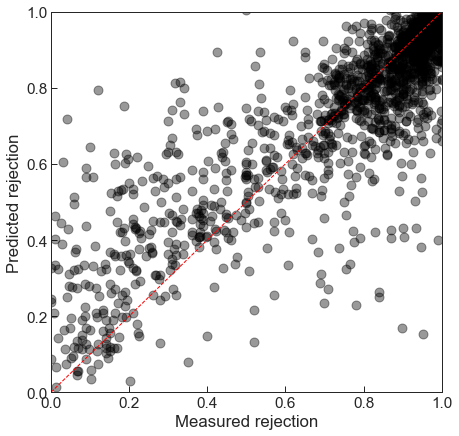

meta NOT subset; don't know how to subset; dropped


In [23]:
fig = plt.figure(figsize=(7,7))
#plt.title('Learning curve_rmse')
plt.plot(results['validation_0']['rmse'], 'k-') #train
plt.plot(results['validation_1']['rmse'], 'r--') #test
plt.xlabel('Number of iterators')
plt.ylabel('Root mean squared error')
plt.xlim(0, 1200)
plt.ylim(0, 0.35)
plt.xticks(np.arange(0,1201,200))
plt.show()
fig.savefig("fig_0_path_3_fin_b2.pdf", bbox_i6nches='tight', transparent=True)

fig = plt.figure(figsize=(7,7))
plt.scatter(y_train, y_pred_train_best, c='k', alpha=0.4, s=80, edgecolors=None)
plt.scatter(y_test, y_pred_test_best, c='r', marker='^', alpha=0.4, s=80, edgecolors=None)
plt.plot(np.arange(0, 1.0, 0.1), np.arange(0, 1.0, 0.1), 'r--')
plt.xlabel('Measured rejection')
plt.ylabel('Predicted rejection')
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()
fig.savefig("fig_1_path_3_fin_b2.pdf", bbox_inches='tight', transparent=True)

fig = plt.figure(figsize=(7,7))        
plt.scatter(y_data_scaled, old, c='k', alpha=0.4, s=80, edgecolors=None)
plt.plot(np.arange(0, 1.01, 0.1), np.arange(0, 1.01, 0.1), 'r--')
#plt.plot([y_data_scaled.min(), y_data_scaled.max()], [y_data_scaled.min(), y_data_scaled.max()], 'k--', lw=2)
plt.xlabel('Measured rejection')
plt.ylabel('Predicted rejection')
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()
fig.savefig("fig_2_path_3_fin_b2.pdf", bbox_inches='tight', transparent=True)

# fig = plt.figure(figsize=(7,7))
# plt.scatter(y_pred_test_best, y_test - y_pred_test_best)
# plt.show()

In [ ]:
# save the model
filename = 'Model_RDkit_2048.sav'
pickle.dump(model_B_best, open(filename, 'wb'))

In [81]:
# save the model
filename = 'Model_RDkit_2048_short_2.sav'
pickle.dump(model_B_best, open(filename, 'wb'))

In [16]:
# save the model
filename = 'Model_Morgan_2048_6.sav'
pickle.dump(model_B_best, open(filename, 'wb'))

In [60]:
# save the model
filename = 'Model_Morgan_2048_6_morgan.sav'
pickle.dump(model_B_best, open(filename, 'wb'))

In [16]:
# save the model
filename = 'Model_PubChem.sav'
pickle.dump(model_B_best, open(filename, 'wb'))

In [16]:
# save the model
filename = 'Model_PubChem_short.sav'
pickle.dump(model_B_best, open(filename, 'wb'))

In [49]:
# save the model
filename = 'Model_MACCS.sav'
pickle.dump(model_B_best, open(filename, 'wb'))

In [52]:
# save the model
filename = 'Model_MACCS_short.sav'
pickle.dump(model_B_best, open(filename, 'wb'))

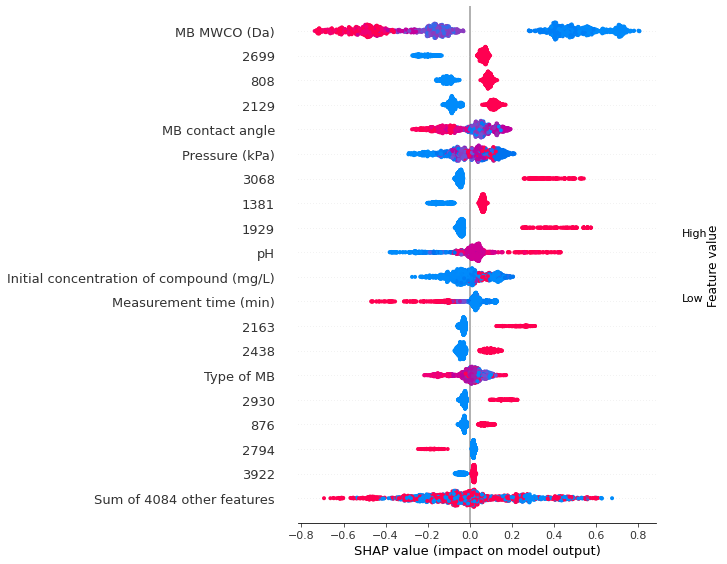

In [25]:
#explainer = shap.Explainer(model_B_best)
explainer = shap.Explainer(model)
shap_values = explainer(x_train, check_additivity=False)
#shap.plots.beeswarm(shap_values, max_display=20, order=shap_values.abs.max(0), show=False)#, color=plt.get_cmap("cool"))
shap.plots.beeswarm(shap_values, max_display=20, order=shap_values.abs.mean(0), show=False)#, color=plt.get_cmap("cool"))
#shap.summary_plot(shap_values, x_train)
#plt.savefig("shap_path_3_fin_b2.pdf", format='pdf', dpi=1000, bbox_inches='tight')
#plt.savefig("shap_morgan.png", format='png', dpi=1000, bbox_inches='tight')

In [49]:
shap.initjs()

In [76]:
shap_values_2 = explainer.shap_values(x_train)
shap.force_plot(explainer.expected_value, shap_values_2[0:5,:], x_train.iloc[0:5,:])

Exception: Additivity check failed in TreeExplainer! Please ensure the data matrix you passed to the explainer is the same shape that the model was trained on. If your data shape is correct then please report this on GitHub. Consider retrying with the feature_perturbation='interventional' option. This check failed because for one of the samples the sum of the SHAP values was 0.041591, while the model output was 0.320452. If this difference is acceptable you can set check_additivity=False to disable this check.

meta NOT subset; don't know how to subset; dropped


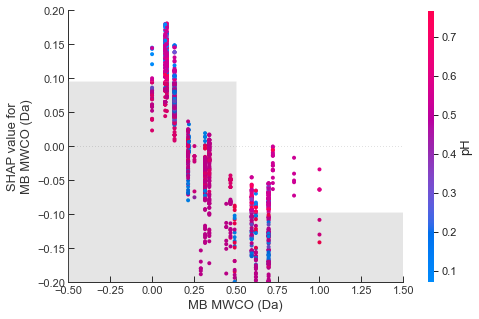

In [21]:
# https://shap.readthedocs.io/en/latest/example_notebooks/api_examples/plots/scatter.html
shap.plots.scatter(shap_values[:,"MB MWCO (Da)"], color=shap_values[:,"pH"], xmin=0, xmax=1.25, ymin=-0.2, ymax=0.2, show=False) #cmap=plt.get_cmap("cool")
plt.savefig("shap_dependence_morgan_2_short.pdf", format='pdf', dpi=1000, bbox_inches='tight')

In [180]:
np.sum(shap_values.abs.max(0).values[3:23])/20

0.0038596674799919128

In [15]:
#https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/
# load the model
loaded_model = pickle.load(open('Model_RDkit_2048_short_2.sav', 'rb'))
result = loaded_model.score(x_test, y_test)
print(result)

0.6953144634628119
